# Import Libraries

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

Mount data menggunakan Google Drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/Home Credit Dataset')

# Exploration and Preprocessing - Application Data

In [ ]:
application = pd.read_csv('application_train.csv')
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_test = pd.read_csv('application_test.csv')
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


## Exploration

<Axes: xlabel='TARGET', ylabel='count'>

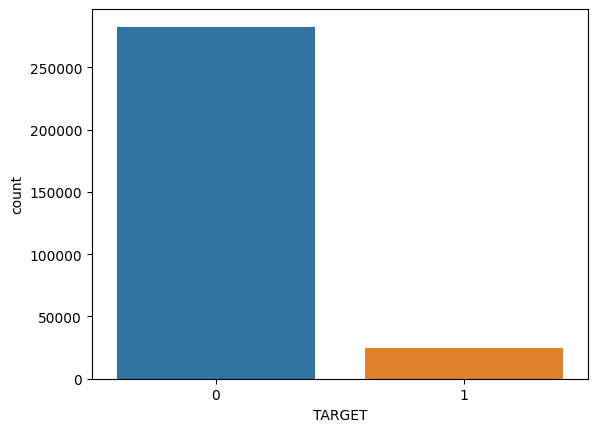

In [ ]:
sns.countplot(application, x="TARGET")

In [ ]:
application['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Data dengan label positif sangat sedikit, sehingga diusahakan tidak ada data positif didrop (contohnya pada drop missing values) dan perlu gabungan antara oversampling dan undersampling. 8.78% pinjaman memiliki kesulitan pada pembayaran.

In [ ]:
application.duplicated(subset=['SK_ID_CURR']).sum()

0

Melihat missing values

In [ ]:
for column in application.columns:
    print(f"{column}: {application[column].isnull().sum()}")

SK_ID_CURR: 0
TARGET: 0
NAME_CONTRACT_TYPE: 0
CODE_GENDER: 0
FLAG_OWN_CAR: 0
FLAG_OWN_REALTY: 0
CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 12
AMT_GOODS_PRICE: 278
NAME_TYPE_SUITE: 1292
NAME_INCOME_TYPE: 0
NAME_EDUCATION_TYPE: 0
NAME_FAMILY_STATUS: 0
NAME_HOUSING_TYPE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_BIRTH: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 202929
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_PHONE: 0
FLAG_EMAIL: 0
OCCUPATION_TYPE: 96391
CNT_FAM_MEMBERS: 2
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
ORGANIZATION_TYPE: 0
EXT_SOURCE_1: 173378
EXT_SOURCE_2: 660
EXT_SOURCE_3: 60965
APARTMENTS_AVG: 156061
BASEMENTAREA_AVG: 179943
YEARS_BEGINEXPLUATATION_AVG: 150007
Y

In [ ]:
application = application[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]

In [ ]:
application

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,NaN,0
2,NaN,0.555912,0.729567,0
3,NaN,0.650442,NaN,0
4,NaN,0.322738,NaN,0
...,...,...,...,...
307506,0.145570,0.681632,NaN,0
307507,NaN,0.115992,NaN,0
307508,0.744026,0.535722,0.218859,0
307509,NaN,0.514163,0.661024,1


In [ ]:
df = application.dropna(how='all',subset=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'])
df

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,NaN,0
2,NaN,0.555912,0.729567,0
3,NaN,0.650442,NaN,0
4,NaN,0.322738,NaN,0
...,...,...,...,...
307506,0.145570,0.681632,NaN,0
307507,NaN,0.115992,NaN,0
307508,0.744026,0.535722,0.218859,0
307509,NaN,0.514163,0.661024,1


In [ ]:
# Fill missing values in 'EXT_SOURCE_1' by the average of 'EXT_SOURCE_2' and 'EXT_SOURCE_3'
df['EXT_SOURCE_1'].fillna(df[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1), inplace=True)

# Fill missing values in 'EXT_SOURCE_2' by the average of 'EXT_SOURCE_1' and 'EXT_SOURCE_3'
df['EXT_SOURCE_2'].fillna(df[['EXT_SOURCE_1', 'EXT_SOURCE_3']].mean(axis=1), inplace=True)

# Fill missing values in 'EXT_SOURCE_3' by the average of 'EXT_SOURCE_1' and 'EXT_SOURCE_2'
df['EXT_SOURCE_3'].fillna(df[['EXT_SOURCE_1', 'EXT_SOURCE_2']].mean(axis=1), inplace=True)

<ipython-input-25-456a960a62fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXT_SOURCE_1'].fillna(df[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1), inplace=True)
<ipython-input-25-456a960a62fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXT_SOURCE_2'].fillna(df[['EXT_SOURCE_1', 'EXT_SOURCE_3']].mean(axis=1), inplace=True)
<ipython-input-25-456a960a62fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXT_SOURCE

In [ ]:
df

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,0.466757,0
2,0.642739,0.555912,0.729567,0
3,0.650442,0.650442,0.650442,0
4,0.322738,0.322738,0.322738,0
...,...,...,...,...
307506,0.145570,0.681632,0.413601,0
307507,0.115992,0.115992,0.115992,0
307508,0.744026,0.535722,0.218859,0
307509,0.587593,0.514163,0.661024,1


In [ ]:
# Create a new column 'average_ext_source'
df['average_ext_source'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

# Sort the DataFrame by 'average_ext_source' in ascending order
df.sort_values(by='average_ext_source', ascending=True)

<ipython-input-27-b5746c01577b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_ext_source'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)


,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,average_ext_source
230344,0.000006,0.000006,0.000006,1,0.000006
232552,0.000011,0.000011,0.000011,1,0.000011
160305,0.000017,0.000017,0.000017,1,0.000017
228301,0.000024,0.000024,0.000024,0,0.000024
96492,0.000057,0.000057,0.000057,1,0.000057
...,...,...,...,...,...
30928,0.859053,0.859053,0.859053,0,0.859053
237941,0.863363,0.863363,0.863363,0,0.863363
113931,0.932669,0.794687,0.863678,0,0.863678
50684,0.938832,0.788800,0.863816,0,0.863816


In [ ]:
df.to_csv('ext_source.csv')

## Melihat Outlier

In [ ]:
(application['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
application['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
application['DAYS_EMPLOYED_ANOM'] = application["DAYS_EMPLOYED"] == 365243
application['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

## Membuat model baseline

Handling missing value dengan mengisikan dengan mean untuk kolom numerik dan dengan 'Unknown' untuk kolom kategorikal

In [ ]:
numeric_columns = application.select_dtypes(include='number').columns
categorical_columns = application.select_dtypes(include='object').columns
for column in numeric_columns:
    application[column] = application[column].fillna(application[column].mean())
application[categorical_columns] = application[categorical_columns].fillna('Unknown')

Kolom kategorical diencode dengan One Hot Encoding

In [ ]:
application = pd.get_dummies(application, columns=categorical_columns)

Kolom numerik dinormalisasi dengan Min Max Scaler

In [ ]:
scaler = MinMaxScaler()
application[numeric_columns] = scaler.fit_transform(application[numeric_columns])

In [ ]:
application.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in application.columns]

In [ ]:
application

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone__brick,WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
0,0.000000,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,...,0,0,0,0,1,0,0,1,0,0
1,0.000003,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,...,0,0,0,0,0,0,0,1,0,0
2,0.000006,0.0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,...,0,0,0,0,0,1,0,0,1,0
3,0.000011,0.0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,...,0,0,0,0,0,1,0,0,1,0
4,0.000014,0.0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,0.896392,0.046133,...,0,0,0,0,1,0,0,1,0,0
307507,0.999992,0.0,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,0.251071,1.000000,...,0,0,0,0,1,0,0,1,0,0
307508,0.999994,0.0,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,0.578523,0.026076,...,0,0,0,1,0,0,0,1,0,0
307509,0.999997,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,0.747914,0.034258,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
X = application.drop(columns=['SK_ID_CURR','TARGET'])
y = application['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 254377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11399
[LightGBM] [Info] Number of data points in the train set: 276759, number of used features: 241
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080872 -> initscore=-2.430560
[LightGBM] [Info] Start training from score -2.430560


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.1491294473883422, Recall: 0.16127711829717561, Accuracy: 0.8537981269510926, Precision: 0.13868356212601196, ROC_AUC: 0.5374190883089255
Logistic Regression - F1 Score: 0.022417934347477984, Recall: 0.011461318051575931, Accuracy: 0.9205905306971904, Precision: 0.509090909090909, ROC_AUC: 0.5052537788816641
Naive Bayes - F1 Score: 0.15333791253720602, Recall: 0.9594760540319279, Accuracy: 0.15826612903225806, Precision: 0.0833274084607181, ROC_AUC: 0.524299827150197
K Nearest Neighbors - F1 Score: 0.027560521415270017, Recall: 0.01514531313958248, Accuracy: 0.9150949531737773, Precision: 0.15289256198347106, ROC_AUC: 0.5039518999199625
LGBM - F1 Score: 0.0341948310139165, Recall: 0.01760130986492018, Accuracy: 0.9210132674297606, Precision: 0.5972222222222222, ROC_AUC: 0.508288450333216
Random Forest - F1 Score: 0.0032693093583980384, Recall: 0.001637331150225133, Accuracy: 0.9206880853277836, Precision: 1.0, ROC_AUC: 0.5008186655751126


ROC_AUC tertinggi terdapat pada model Decision Tree, namun performanya buruk karena nilai yang diraih random guessing adalah 0.5, sehingga nilai ROC_AUC Decision Tree hanya 0.54



## Seleksi Fitur

Hapus fitur yang memiliki korelasi tinggi

In [ ]:
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone__brick,WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,0.852140,0.705433,...,0,0,0,0,1,0,0,1,0,0
1,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,0.951929,0.959566,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,0.827335,0.648326,...,0,0,0,0,0,1,0,0,1,0
3,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,0.601451,0.661387,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,0.825268,0.519522,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.001127,0.052360,0.101176,0.046016,0.446855,0.896392,0.046133,0.657263,0.724607,...,0,0,0,0,1,0,0,1,0,0
307507,0.0,0.000396,0.056067,0.040505,0.046016,0.344429,0.251071,1.000000,0.822147,0.431708,...,0,0,0,0,1,0,0,1,0,0
307508,0.0,0.001089,0.157969,0.110618,0.135802,0.065247,0.578523,0.026076,0.726937,0.284424,...,0,0,0,1,0,0,0,1,0,0
307509,0.0,0.001243,0.081175,0.072499,0.069585,0.069553,0.747914,0.034258,0.896158,0.870641,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
correlation_matrix = X.corr().abs()
mask = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)
columns_to_drop = [col for col in mask.columns if any(mask[col])]
df_filtered = X.drop(columns=columns_to_drop)
df_filtered

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone__brick,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,0.001512,0.090032,0.256321,0.888839,0.964437,0.852140,0.705433,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.002089,0.132924,0.045016,0.477114,0.933676,0.951929,0.959566,0.132539,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.000358,0.020025,0.134897,0.348534,0.987439,0.827335,0.648326,0.285714,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000935,0.109477,0.107023,0.350846,0.830337,0.601451,0.661387,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000819,0.078975,0.392880,0.298591,0.830393,0.825268,0.519522,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.001127,0.101176,0.446855,0.896392,0.986824,0.657263,0.724607,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
307507,0.000396,0.040505,0.344429,0.251071,0.866895,0.822147,0.431708,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
307508,0.001089,0.110618,0.065247,0.578523,0.557782,0.726937,0.284424,0.132539,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
307509,0.001243,0.072499,0.069553,0.747914,0.732805,0.896158,0.870641,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
sel = VarianceThreshold(threshold=0.01)
df_filtered = sel.fit_transform(df_filtered)

In [ ]:
df_filtered.shape

(307511, 83)

In [ ]:
X = df_filtered
y = application['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

[LightGBM] [Info] Number of positive: 22382, number of negative: 254377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 276759, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080872 -> initscore=-2.430560
[LightGBM] [Info] Start training from score -2.430560


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.1488162344983089, Recall: 0.16209578387228818, Accuracy: 0.8526925078043704, Precision: 0.13754775963876345, ROC_AUC: 0.5371925809043169
Logistic Regression - F1 Score: 0.017677782241864202, Recall: 0.009005321326238231, Accuracy: 0.9204929760665973, Precision: 0.4782608695652174, ROC_AUC: 0.5040787672016758
Naive Bayes - F1 Score: 0.21131012276111893, Recall: 0.4297994269340974, Accuracy: 0.7451222684703434, Precision: 0.1400933955970647, ROC_AUC: 0.6010666568419472
K Nearest Neighbors - F1 Score: 0.026325686348251224, Recall: 0.014326647564469915, Accuracy: 0.9158103537981269, Precision: 0.16203703703703703, ROC_AUC: 0.5039664605938496
LGBM - F1 Score: 0.02090032154340836, Recall: 0.010642652476463364, Accuracy: 0.9207856399583767, Precision: 0.5777777777777777, ROC_AUC: 0.5049857439145891
Random Forest - F1 Score: 0.0032639738882088943, Recall: 0.001637331150225133, Accuracy: 0.9205580124869928, Precision: 0.5, ROC_AUC: 0.500748016664872


Perbedaan pada F1 Score dan ROC_AUC Score sangat sedikit dibandingkan menggunakan semua fitur dimana perbedaan terbesar terdapat pada Naive Bayes, sehingga disarankan menggunakan model dengan seleksi fitur.<br>
Classifier	F1 difference	ROC_AUC difference<br>
DT	-0.000313213	-0.000226507<br>
LR	-0.004740152	-0.001175012<br>
NB	0.05797221	0.07676683<br>
KNN	-0.001234835	1.46E-05<br>
LGBM	-0.013294509	-0.003302706<br>
RF	-5.34E-06	-7.06E-05<br>


## Sampling - Random Undersampling

Tanpa seleksi fitur

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10844
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 228
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.18970435684647302, Recall: 0.5988538681948424, Accuracy: 0.5935874089490114, Precision: 0.11270318157306833, ROC_AUC: 0.59599339705973
Logistic Regression - F1 Score: 0.25646914714438834, Recall: 0.6856324191567744, Accuracy: 0.6841831425598335, Precision: 0.15773613334588946, ROC_AUC: 0.684845246280496
Naive Bayes - F1 Score: 0.1661412487205732, Recall: 0.8305362259516987, Accuracy: 0.3377016129032258, Precision: 0.09230279319443181, ROC_AUC: 0.5628536864683782
K Nearest Neighbors - F1 Score: 0.1760185411075872, Recall: 0.5906672124437168, Accuracy: 0.5606789802289281, Precision: 0.1034186196516878, ROC_AUC: 0.5743791394445084
LGBM - F1 Score: 0.26633594295015894, Recall: 0.7032337290216947, Accuracy: 0.6922151404786681, Precision: 0.16427615222795947, ROC_AUC: 0.6972489956352247
Random Forest - F1 Score: 0.2541453587478692, Recall: 0.6713057715923045, Accuracy: 0.6869797086368367, Precision: 0.1567428079900602, ROC_AUC: 0.679819052033038


Random Undersampling meningkatkan nilai ROC_AUC secara signifikan.

Dengan seleksi fitur

In [ ]:
correlation_matrix = X.corr().abs()
mask = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)
columns_to_drop = [col for col in mask.columns if any(mask[col])]
df_filtered = X.drop(columns=columns_to_drop)
df_filtered

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,...,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone__brick,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,0.001512,0.090032,0.256321,0.888839,0.964437,0.852140,0.705433,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.002089,0.132924,0.045016,0.477114,0.933676,0.951929,0.959566,0.132539,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.000358,0.020025,0.134897,0.348534,0.987439,0.827335,0.648326,0.285714,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000935,0.109477,0.107023,0.350846,0.830337,0.601451,0.661387,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000819,0.078975,0.392880,0.298591,0.830393,0.825268,0.519522,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.001127,0.101176,0.446855,0.896392,0.986824,0.657263,0.724607,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
307507,0.000396,0.040505,0.344429,0.251071,0.866895,0.822147,0.431708,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
307508,0.001089,0.110618,0.065247,0.578523,0.557782,0.726937,0.284424,0.132539,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
307509,0.001243,0.072499,0.069553,0.747914,0.732805,0.896158,0.870641,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
sel = VarianceThreshold(threshold=0.01)
df_filtered = sel.fit_transform(df_filtered)

In [ ]:
df_filtered.shape

(307511, 83)

In [ ]:
X = df_filtered
y = application['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2290
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.187011997714721, Recall: 0.6029471960704053, Accuracy: 0.5835392819979188, Precision: 0.11066867017280241, ROC_AUC: 0.5924058104058267
Logistic Regression - F1 Score: 0.2549229125324378, Recall: 0.683585755218993, Accuracy: 0.682557232049948, Precision: 0.15667511023548175, ROC_AUC: 0.683027114071399
Naive Bayes - F1 Score: 0.19984973703981967, Recall: 0.5988538681948424, Accuracy: 0.6190491675338189, Precision: 0.11993769470404984, ROC_AUC: 0.6098229212393195
K Nearest Neighbors - F1 Score: 0.1769393599800772, Recall: 0.5816618911174785, Accuracy: 0.5701092611862643, Precision: 0.10433952566267714, ROC_AUC: 0.5753870937801528
LGBM - F1 Score: 0.2552705685364183, Recall: 0.686451084731887, Accuracy: 0.6818093132154006, Precision: 0.15678758414360508, ROC_AUC: 0.6839299120010418
Random Forest - F1 Score: 0.24948657488400397, Recall: 0.6713057715923045, Accuracy: 0.6791428199791884, Precision: 0.1532137518684604, ROC_AUC: 0.6755624551910443


## Sampling - SMOTE Oversampling

In [ ]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 254377, number of negative: 254377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.436246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22853
[LightGBM] [Info] Number of data points in the train set: 508754, number of used features: 243
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.14986376021798367, Recall: 0.18010642652476463, Accuracy: 0.8376690946930281, Precision: 0.1283172936716244, ROC_AUC: 0.5372608150851242
Logistic Regression - F1 Score: 0.14432989690721648, Recall: 0.09455587392550144, Accuracy: 0.9109326222684704, Precision: 0.30474934036939316, ROC_AUC: 0.5379699430385569
Naive Bayes - F1 Score: 0.15326402995180627, Recall: 0.787556283258289, Accuracy: 0.30869536940686787, Precision: 0.08489234027532651, ROC_AUC: 0.5274635420318433
K Nearest Neighbors - F1 Score: 0.16753995284254652, Recall: 0.5235366352844862, Accuracy: 0.5866935483870968, Precision: 0.0997270955165692, ROC_AUC: 0.5578402382328681
LGBM - F1 Score: 0.029564522572912505, Recall: 0.01514531313958248, Accuracy: 0.9210132674297606, Precision: 0.6166666666666667, ROC_AUC: 0.507166425335908
Random Forest - F1 Score: 0.023070803500397776, Recall: 0.011870650839132215, Accuracy: 0.9201352757544224, Precision: 0.4084507042253521, ROC_AUC: 0.5051935118620402


In [ ]:
X_smote.shape

(508754, 251)

# Exploration and Preprocessing - Bureau Data

In [ ]:
bureau = pd.read_csv('bureau.csv')

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


## Exploration

In [ ]:
bureau.duplicated(subset=['SK_ID_CURR']).sum()

1410617

In [ ]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [ ]:
bureau['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [ ]:
bureau['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

<Axes: xlabel='CREDIT_ACTIVE', ylabel='count'>

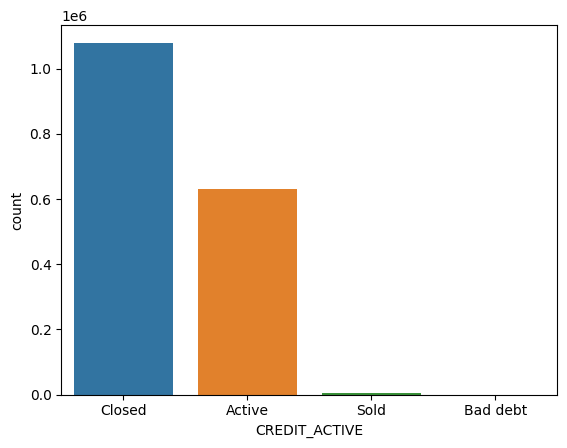

In [ ]:
sns.countplot(bureau, x="CREDIT_ACTIVE")

<Axes: xlabel='CREDIT_CURRENCY', ylabel='count'>

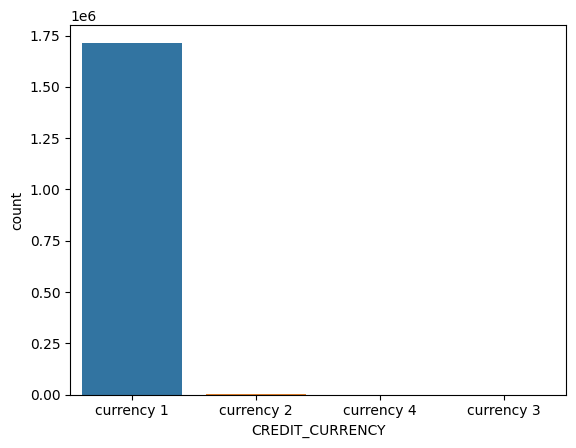

In [ ]:
sns.countplot(bureau, x="CREDIT_CURRENCY")

<Axes: xlabel='count', ylabel='CREDIT_TYPE'>

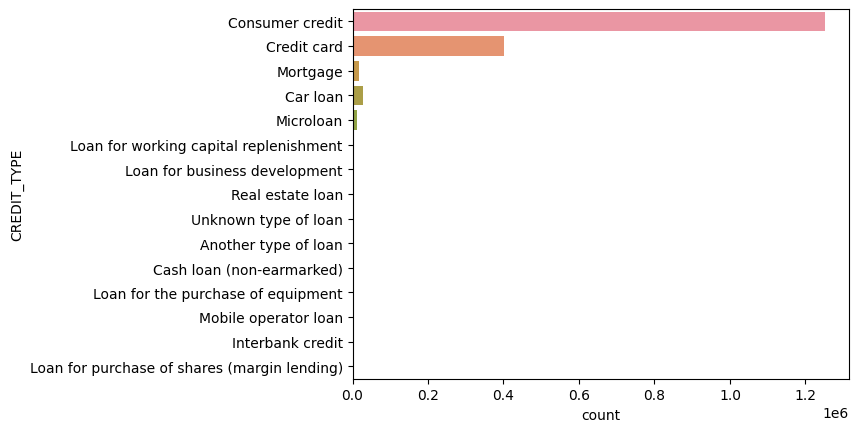

In [ ]:
sns.countplot(bureau, y="CREDIT_TYPE")

In [ ]:
for column in bureau.columns:
    print(f"{column}: {bureau[column].isnull().sum()}")

SK_ID_CURR: 0
SK_ID_BUREAU: 0
CREDIT_ACTIVE: 0
CREDIT_CURRENCY: 0
DAYS_CREDIT: 0
CREDIT_DAY_OVERDUE: 0
DAYS_CREDIT_ENDDATE: 105553
DAYS_ENDDATE_FACT: 633653
AMT_CREDIT_MAX_OVERDUE: 1124488
CNT_CREDIT_PROLONG: 0
AMT_CREDIT_SUM: 13
AMT_CREDIT_SUM_DEBT: 257669
AMT_CREDIT_SUM_LIMIT: 591780
AMT_CREDIT_SUM_OVERDUE: 0
CREDIT_TYPE: 0
DAYS_CREDIT_UPDATE: 0
AMT_ANNUITY: 1226791


In [ ]:
for column in bureau.columns:
    print(f"{column}: {len(bureau[bureau[column] == 0])}")

SK_ID_CURR: 0
SK_ID_BUREAU: 0
CREDIT_ACTIVE: 0
CREDIT_CURRENCY: 0
DAYS_CREDIT: 25
CREDIT_DAY_OVERDUE: 1712211
DAYS_CREDIT_ENDDATE: 883
DAYS_ENDDATE_FACT: 64
AMT_CREDIT_MAX_OVERDUE: 470650
CNT_CREDIT_PROLONG: 1707314
AMT_CREDIT_SUM: 66582
AMT_CREDIT_SUM_DEBT: 1016434
AMT_CREDIT_SUM_LIMIT: 1050142
AMT_CREDIT_SUM_OVERDUE: 1712270
CREDIT_TYPE: 0
DAYS_CREDIT_UPDATE: 605
AMT_ANNUITY: 256915


In [ ]:
AMT_CREDIT_SUM_zero_rows = len(bureau[bureau['AMT_CREDIT_SUM'] == 0])
AMT_CREDIT_SUM_zero_rows

66582

Ada 66582 baris dimana nilai pada kolom AMT_CREDIT_SUM adalah 0, sehingga kemungkinan besar null value tidak berarti 0

In [ ]:
AMT_CREDIT_SUM_null = bureau[bureau['AMT_CREDIT_SUM'].isnull()]
AMT_CREDIT_SUM_null

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
218508,405791,6008179,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,654993.0,NaN,0.0,Another type of loan,-5,NaN
314570,418331,6064357,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,2250000.0,NaN,0.0,Another type of loan,-16,NaN
572703,367465,6299480,Active,currency 1,0,0,388.0,NaN,NaN,0,NaN,1204582.5,NaN,0.0,Another type of loan,-5,NaN
585311,371162,6452468,Closed,currency 1,0,0,NaN,-111.0,NaN,0,NaN,0.0,NaN,0.0,Another type of loan,-64,NaN
590328,209921,5491946,Closed,currency 1,-5,0,NaN,-46.0,NaN,0,NaN,0.0,NaN,0.0,Another type of loan,-36,NaN
814128,425959,6388671,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,185926.5,NaN,0.0,Another type of loan,-3,NaN
987620,375588,5078559,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,1309572.0,NaN,0.0,Another type of loan,-39,NaN
1055762,118044,6753699,Active,currency 1,-422,0,643.0,NaN,NaN,0,NaN,0.0,NaN,0.0,Consumer credit,-29,15979.5
1113131,139064,6121986,Closed,currency 1,0,0,NaN,-72.0,NaN,0,NaN,0.0,NaN,0.0,Another type of loan,-23,NaN
1172368,207533,5875729,Closed,currency 1,0,0,NaN,-441.0,NaN,0,NaN,0.0,NaN,0.0,Another type of loan,-77,NaN


Baris dimana AMT_CREDIT_SUM adalah null memiliki kategori yang beragam. Untuk CREDIT_ACTIVE terdapat kategory Active dan Closed. Untuk CREDIT_CURRENCY hanya terdapat kategory currency 1. Untuk CREDIT_TYPE terdapat kategory Another type of loan dan Consumer credit. Missing value handling pada kolom CREDIT_CURRENCY akan menggunakan average dari AMT_CREDIT_SUM pada SK_ID_CURR tersebut. Jika terdapat SK_ID_CURR dengan AMT_CREDIT_SUM yang semuanya null, maka gunakan average seluruh bureau.csv.

In [ ]:
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('mean'))

In [ ]:
AMT_CREDIT_SUM_null = bureau[bureau['AMT_CREDIT_SUM'].isnull()]
AMT_CREDIT_SUM_null

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
314570,418331,6064357,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,2250000.0,NaN,0.0,Another type of loan,-16,NaN
1176556,151540,5953196,Active,currency 1,-1067,0,777.0,NaN,NaN,0,NaN,0.0,NaN,0.0,Consumer credit,-14,31234.5


In [ ]:
overall_mean = bureau['AMT_CREDIT_SUM'].mean()
bureau['AMT_CREDIT_SUM'].fillna(overall_mean, inplace=True)

Data Bureau diagregasi dengan cara berikut:<br>
Number of bureau rows<br>
CREDIT_ACTIVE count per category + majority voting<br>
CREDIT_CURRENCY count per category + majority voting<br>
CREDIT_TYPE count per category + majority voting<br>
DAYS_CREDIT count where > 0 + average where > 0<br>
CREDIT_DAY_OVERDUE count where > 0 + average where > 0<br>
DAYS_CREDIT_ENDDATE count where > 0 + average where > 0<br>
DAYS_ENDDATE_FACT count where > 0 + average where > 0<br>
AMT_CREDIT_MAX_OVERDUE count where > 0 + average where > 0<br>
CNT_CREDIT_PROLONG count where > 0 + average where > 0<br>
AMT_CREDIT_SUM count where > 0 + average where > 0<br>
AMT_CREDIT_SUM_DEBT count where > 0 + average where > 0<br>
AMT_CREDIT_SUM_LIMIT count where > 0 + average where > 0<br>
AMT_CREDIT_SUM_OVERDUE count where > 0 + average where > 0<br>
DAYS_CREDIT_UPDATE count where > 0 + average where > 0<br>
AMT_ANNUITY count where > 0 + average where > 0<br>

## Agregasi count

In [ ]:
count_per_id = bureau.groupby('SK_ID_CURR').size().reset_index(name='Count_Bureau')
count_per_id

,SK_ID_CURR,Count_Bureau
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


## Agregasi dengan count per category + majority voting

In [ ]:
credit_active = bureau.groupby(['SK_ID_CURR', 'CREDIT_ACTIVE']).size().unstack(fill_value=0)
credit_active.reset_index(inplace=True)
credit_active.columns.name = None
credit_active.columns = ['SK_ID_CURR'] + [f'CREDIT_ACTIVE_{credit_active}' for credit_active in credit_active.columns[1:]]
credit_active['majority_CREDIT_ACTIVE'] = credit_active.iloc[:, 1:].idxmax(axis=1).str.split('_').str[-1]
credit_active

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,majority_CREDIT_ACTIVE
0,100001,3,0,4,0,Closed
1,100002,2,0,6,0,Closed
2,100003,1,0,3,0,Closed
3,100004,0,0,2,0,Closed
4,100005,2,0,1,0,Active
...,...,...,...,...,...,...
305806,456249,2,0,11,0,Closed
305807,456250,2,0,1,0,Active
305808,456253,2,0,2,0,Active
305809,456254,0,0,1,0,Closed


In [ ]:
credit_active['majority_CREDIT_ACTIVE'].value_counts()

Closed      180692
Active      124895
Sold           223
Bad debt         1
Name: majority_CREDIT_ACTIVE, dtype: int64

In [ ]:
credit_currency = bureau.groupby(['SK_ID_CURR', 'CREDIT_CURRENCY']).size().unstack(fill_value=0)
credit_currency.reset_index(inplace=True)
credit_currency.columns.name = None
credit_currency.columns = ['SK_ID_CURR'] + [f'CREDIT_CURRENCY_{credit_currency}' for credit_currency in credit_currency.columns[1:]]
credit_currency['majority_CREDIT_CURRENCY'] = credit_currency.iloc[:, 1:].idxmax(axis=1).str.split('_').str[-1]
credit_currency

,SK_ID_CURR,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,majority_CREDIT_CURRENCY
0,100001,7,0,0,0,currency 1
1,100002,8,0,0,0,currency 1
2,100003,4,0,0,0,currency 1
3,100004,2,0,0,0,currency 1
4,100005,3,0,0,0,currency 1
...,...,...,...,...,...,...
305806,456249,13,0,0,0,currency 1
305807,456250,3,0,0,0,currency 1
305808,456253,4,0,0,0,currency 1
305809,456254,1,0,0,0,currency 1


In [ ]:
credit_currency['majority_CREDIT_CURRENCY'].value_counts()

currency 1    305759
currency 2        51
currency 3         1
Name: majority_CREDIT_CURRENCY, dtype: int64

In [ ]:
credit_type = bureau.groupby(['SK_ID_CURR', 'CREDIT_TYPE']).size().unstack(fill_value=0)
credit_type.reset_index(inplace=True)
credit_type.columns.name = None
credit_type.columns = ['SK_ID_CURR'] + [f'CREDIT_TYPE_{credit_type}' for credit_type in credit_type.columns[1:]]
credit_type['majority_CREDIT_TYPE'] = credit_type.iloc[:, 1:].idxmax(axis=1).str.split('_').str[-1]
credit_type

,SK_ID_CURR,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,majority_CREDIT_TYPE
0,100001,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,Consumer credit
1,100002,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,Consumer credit
2,100003,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,Consumer credit
3,100004,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,Consumer credit
4,100005,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,Consumer credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,1,0,0,9,3,0,0,0,0,0,0,0,0,0,0,Consumer credit
305807,456250,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,Consumer credit
305808,456253,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,Consumer credit
305809,456254,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Consumer credit


In [ ]:
credit_type['majority_CREDIT_TYPE'].value_counts()

Consumer credit                           266578
Credit card                                31670
Car loan                                    5055
Mortgage                                    1308
Microloan                                    900
Another type of loan                         179
Loan for business development                 92
Loan for working capital replenishment        16
Unknown type of loan                           9
Loan for the purchase of equipment             2
Real estate loan                               1
Cash loan (non-earmarked)                      1
Name: majority_CREDIT_TYPE, dtype: int64

In [ ]:
aggregated_bureau = count_per_id.merge(credit_active, on='SK_ID_CURR', how='outer') \
    .merge(credit_currency, on='SK_ID_CURR', how='outer') \
    .merge(credit_type, on='SK_ID_CURR', how='outer')
aggregated_bureau

,SK_ID_CURR,Count_Bureau,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,majority_CREDIT_ACTIVE,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,majority_CREDIT_TYPE
0,100001,7,3,0,4,0,Closed,7,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
1,100002,8,2,0,6,0,Closed,8,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
2,100003,4,1,0,3,0,Closed,4,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
3,100004,2,0,0,2,0,Closed,2,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
4,100005,3,2,0,1,0,Active,3,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2,0,11,0,Closed,13,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
305807,456250,3,2,0,1,0,Active,3,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
305808,456253,4,2,0,2,0,Active,4,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit
305809,456254,1,0,0,1,0,Closed,1,0,0,...,0,0,0,0,0,0,0,0,0,Consumer credit


## Agregasi dengan count where > 0 + average where > 0

In [ ]:
result_df = bureau.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'CREDIT_DAY_OVERDUE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'DAYS_CREDIT_ENDDATE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'DAYS_ENDDATE_FACT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT_MAX_OVERDUE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'CNT_CREDIT_PROLONG': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT_SUM': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT_SUM_DEBT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT_SUM_LIMIT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT_SUM_OVERDUE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'DAYS_CREDIT_UPDATE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_ANNUITY': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())]
}).reset_index()

In [ ]:
result_df.columns = ['SK_ID_CURR'] + [f'{col[0]}_{col[1]}' for col in result_df.columns[1:]]

In [ ]:
result_df

,SK_ID_CURR,DAYS_CREDIT_Count_Greater_than_Zero,DAYS_CREDIT_Average_Greater_than_Zero,CREDIT_DAY_OVERDUE_Count_Greater_than_Zero,CREDIT_DAY_OVERDUE_Average_Greater_than_Zero,DAYS_CREDIT_ENDDATE_Count_Greater_than_Zero,DAYS_CREDIT_ENDDATE_Average_Greater_than_Zero,DAYS_ENDDATE_FACT_Count_Greater_than_Zero,DAYS_ENDDATE_FACT_Average_Greater_than_Zero,AMT_CREDIT_MAX_OVERDUE_Count_Greater_than_Zero,...,AMT_CREDIT_SUM_DEBT_Count_Greater_than_Zero,AMT_CREDIT_SUM_DEBT_Average_Greater_than_Zero,AMT_CREDIT_SUM_LIMIT_Count_Greater_than_Zero,AMT_CREDIT_SUM_LIMIT_Average_Greater_than_Zero,AMT_CREDIT_SUM_OVERDUE_Count_Greater_than_Zero,AMT_CREDIT_SUM_OVERDUE_Average_Greater_than_Zero,DAYS_CREDIT_UPDATE_Count_Greater_than_Zero,DAYS_CREDIT_UPDATE_Average_Greater_than_Zero,AMT_ANNUITY_Count_Greater_than_Zero,AMT_ANNUITY_Average_Greater_than_Zero
0,100001,0,NaN,0,NaN,3,1030.333333,0,NaN,0,...,3,1.988955e+05,0,NaN,0,NaN,0,NaN,3,8272.500
1,100002,0,NaN,0,NaN,3,309.000000,0,NaN,3,...,1,2.457810e+05,1,31988.565,0,NaN,0,NaN,0,NaN
2,100003,0,NaN,0,NaN,1,1216.000000,0,NaN,0,...,0,NaN,1,810000.000,0,NaN,0,NaN,0,NaN
3,100004,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,100005,0,NaN,0,NaN,2,723.000000,0,NaN,0,...,2,2.842042e+05,0,NaN,0,NaN,0,NaN,1,4261.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,0,NaN,0,NaN,1,1363.000000,0,NaN,2,...,1,1.630710e+05,0,NaN,0,NaN,0,NaN,0,NaN
305807,456250,0,NaN,0,NaN,2,2068.500000,0,NaN,0,...,2,1.116020e+06,1,58268.385,0,NaN,0,NaN,3,154567.965
305808,456253,0,NaN,0,NaN,2,750.000000,0,NaN,0,...,2,8.979165e+05,0,NaN,0,NaN,0,NaN,3,58369.500
305809,456254,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [ ]:
aggregated_bureau = aggregated_bureau.merge(result_df, on='SK_ID_CURR', how='outer')

In [ ]:
aggregated_bureau

,SK_ID_CURR,Count_Bureau,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,majority_CREDIT_ACTIVE,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,...,AMT_CREDIT_SUM_DEBT_Count_Greater_than_Zero,AMT_CREDIT_SUM_DEBT_Average_Greater_than_Zero,AMT_CREDIT_SUM_LIMIT_Count_Greater_than_Zero,AMT_CREDIT_SUM_LIMIT_Average_Greater_than_Zero,AMT_CREDIT_SUM_OVERDUE_Count_Greater_than_Zero,AMT_CREDIT_SUM_OVERDUE_Average_Greater_than_Zero,DAYS_CREDIT_UPDATE_Count_Greater_than_Zero,DAYS_CREDIT_UPDATE_Average_Greater_than_Zero,AMT_ANNUITY_Count_Greater_than_Zero,AMT_ANNUITY_Average_Greater_than_Zero
0,100001,7,3,0,4,0,Closed,7,0,0,...,3,1.988955e+05,0,NaN,0,NaN,0,NaN,3,8272.500
1,100002,8,2,0,6,0,Closed,8,0,0,...,1,2.457810e+05,1,31988.565,0,NaN,0,NaN,0,NaN
2,100003,4,1,0,3,0,Closed,4,0,0,...,0,NaN,1,810000.000,0,NaN,0,NaN,0,NaN
3,100004,2,0,0,2,0,Closed,2,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,100005,3,2,0,1,0,Active,3,0,0,...,2,2.842042e+05,0,NaN,0,NaN,0,NaN,1,4261.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2,0,11,0,Closed,13,0,0,...,1,1.630710e+05,0,NaN,0,NaN,0,NaN,0,NaN
305807,456250,3,2,0,1,0,Active,3,0,0,...,2,1.116020e+06,1,58268.385,0,NaN,0,NaN,3,154567.965
305808,456253,4,2,0,2,0,Active,4,0,0,...,2,8.979165e+05,0,NaN,0,NaN,0,NaN,3,58369.500
305809,456254,1,0,0,1,0,Closed,1,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [ ]:
aggregated_bureau.to_excel('aggregated_bureau.xlsx')

#Exploration and Preprocessing - Bureau Balance Data

In [ ]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [ ]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


## Exploration

In [ ]:
bureau_balance.head(50)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


## Agregasi data

Data Bureau Balance akan diaggregate dengan cara mengambil minimum dari MONTHS_BALANCE, count per status, dan count total per SK_ID_BUREAU.

In [ ]:
result_df = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['count', 'min']
}).reset_index()
result_df.columns = ['SK_ID_BUREAU', 'Count', 'Min_MONTHS_BALANCE']
result_df

,SK_ID_BUREAU,Count,Min_MONTHS_BALANCE
0,5001709,97,-96
1,5001710,83,-82
2,5001711,4,-3
3,5001712,19,-18
4,5001713,22,-21
...,...,...,...
817390,6842884,48,-47
817391,6842885,24,-23
817392,6842886,33,-32
817393,6842887,37,-36


In [ ]:
status = bureau_balance.groupby(['SK_ID_BUREAU', 'STATUS']).size().unstack(fill_value=0)
status.reset_index(inplace=True)
status.columns.name = None
status.columns = ['SK_ID_BUREAU'] + [f'STATUS_{status}' for status in status.columns[1:]]
status['majority_STATUS'] = status.iloc[:, 1:].idxmax(axis=1).str.split('_').str[-1]
status

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,majority_STATUS
0,5001709,0,0,0,0,0,0,86,11,C
1,5001710,5,0,0,0,0,0,48,30,C
2,5001711,3,0,0,0,0,0,0,1,0
3,5001712,10,0,0,0,0,0,9,0,0
4,5001713,0,0,0,0,0,0,0,22,X
...,...,...,...,...,...,...,...,...,...,...
817390,6842884,9,0,0,0,0,0,20,19,C
817391,6842885,12,0,0,0,0,12,0,0,0
817392,6842886,8,0,0,0,0,0,25,0,C
817393,6842887,6,0,0,0,0,0,31,0,C


In [ ]:
aggregated_bureau_balance = result_df.merge(status, on='SK_ID_BUREAU', how='outer')
aggregated_bureau_balance

,SK_ID_BUREAU,Count,Min_MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,majority_STATUS
0,5001709,97,-96,0,0,0,0,0,0,86,11,C
1,5001710,83,-82,5,0,0,0,0,0,48,30,C
2,5001711,4,-3,3,0,0,0,0,0,0,1,0
3,5001712,19,-18,10,0,0,0,0,0,9,0,0
4,5001713,22,-21,0,0,0,0,0,0,0,22,X
...,...,...,...,...,...,...,...,...,...,...,...,...
817390,6842884,48,-47,9,0,0,0,0,0,20,19,C
817391,6842885,24,-23,12,0,0,0,0,12,0,0,0
817392,6842886,33,-32,8,0,0,0,0,0,25,0,C
817393,6842887,37,-36,6,0,0,0,0,0,31,0,C


In [ ]:
aggregated_bureau_balance.to_excel('aggregated_bureau_balance.xlsx')

In [ ]:
aggregated_bureau_balance = pd.read_excel('aggregated_bureau_balance.xlsx')

In [ ]:
bureau[['SK_ID_CURR','SK_ID_BUREAU']]

,SK_ID_CURR,SK_ID_BUREAU
0,215354,5714462
1,215354,5714463
2,215354,5714464
3,215354,5714465
4,215354,5714466
...,...,...
1716423,259355,5057750
1716424,100044,5057754
1716425,100044,5057762
1716426,246829,5057770


In [ ]:
merged_bureau = bureau[['SK_ID_CURR','SK_ID_BUREAU']].merge(aggregated_bureau_balance, on='SK_ID_BUREAU', how='left')

In [ ]:
merged_bureau

,SK_ID_CURR,SK_ID_BUREAU,Count,Min_MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,majority_STATUS
0,215354,5714462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716424,100044,5057754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716425,100044,5057762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716426,246829,5057770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_bureau[merged_bureau['Count'].notnull()]

,SK_ID_CURR,SK_ID_BUREAU,Count,Min_MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,majority_STATUS
768,380361,5715448,27.0,-26.0,8.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,X
769,380361,5715449,12.0,-11.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,C
770,380361,5715451,26.0,-30.0,17.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0
771,380361,5715452,33.0,-32.0,8.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,C
772,380361,5715453,38.0,-37.0,8.0,0.0,0.0,0.0,0.0,0.0,20.0,10.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716288,229054,5053730,15.0,-14.0,11.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0
1716289,254479,5053734,52.0,-51.0,7.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,C
1716290,363575,5053740,41.0,-40.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,18.0,C
1716291,245498,5053747,85.0,-84.0,18.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,C


In [ ]:
for column in merged_bureau.columns:
    print(f"{column}: {merged_bureau[column].isnull().sum()}")

SK_ID_CURR: 0
SK_ID_BUREAU: 0
Count: 942074
Min_MONTHS_BALANCE: 942074
STATUS_0: 942074
STATUS_1: 942074
STATUS_2: 942074
STATUS_3: 942074
STATUS_4: 942074
STATUS_5: 942074
STATUS_C: 942074
STATUS_X: 942074
majority_STATUS: 942074


In [ ]:
common_ids = set(bureau_balance['SK_ID_BUREAU']) & set(bureau['SK_ID_BUREAU'])
num_common_ids = len(common_ids)

# Check the number of SK_ID_BUREAU in bureau_balance that are not in bureau
ids_only_in_bureau_balance = set(bureau_balance['SK_ID_BUREAU']) - set(bureau['SK_ID_BUREAU'])
num_ids_only_in_bureau_balance = len(ids_only_in_bureau_balance)

# Check the number of SK_ID_BUREAU in bureau that are not in bureau_balance
ids_only_in_bureau = set(bureau['SK_ID_BUREAU']) - set(bureau_balance['SK_ID_BUREAU'])
num_ids_only_in_bureau = len(ids_only_in_bureau)

# Display the results
print(f"Number of SK_ID_BUREAU in bureau_balance that are also in bureau: {num_common_ids}")
print(f"Number of SK_ID_BUREAU in bureau_balance that are not in bureau: {num_ids_only_in_bureau_balance}")
print(f"Number of SK_ID_BUREAU in bureau that are not in bureau_balance: {num_ids_only_in_bureau}")

Number of SK_ID_BUREAU in bureau_balance that are also in bureau: 774354
Number of SK_ID_BUREAU in bureau_balance that are not in bureau: 43041
Number of SK_ID_BUREAU in bureau that are not in bureau_balance: 942074


Sebanyak 942074 SK_ID_BUREAU, di data bureau tidak ada di bureau_balance.

In [ ]:
aggregated_merged_bureau = merged_bureau.groupby('SK_ID_CURR').agg({
    'Count': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())]
}).reset_index()

In [ ]:
aggregated_merged_bureau.columns = ['SK_ID_CURR'] + [f'{col[0]}_{col[1]}' for col in aggregated_merged_bureau.columns[1:]]

In [ ]:
aggregated_merged_bureau.columns = ['SK_ID_CURR', 'Count_Greater_than_Zero', 'Average_Greater_than_Zero']

In [ ]:
aggregated_merged_bureau

,SK_ID_CURR,Count_Greater_than_Zero,Average_Greater_than_Zero
0,100001,7,24.571429
1,100002,8,13.750000
2,100003,0,NaN
3,100004,0,NaN
4,100005,3,7.000000
...,...,...,...
305806,456249,0,NaN
305807,456250,3,29.000000
305808,456253,4,29.250000
305809,456254,1,37.000000


In [ ]:
Count_zero_rows = len(aggregated_merged_bureau[aggregated_merged_bureau['Count_Greater_than_Zero'] == 0])
Count_zero_rows

171269

Hanya 171269 dari 305811 SK_ID_CURR memiliki setidaknya satu SK_ID_BUREAU yang ada di data bureau_balance

In [ ]:
merged_df = application.merge(aggregated_merged_bureau, on='SK_ID_CURR', how='left')

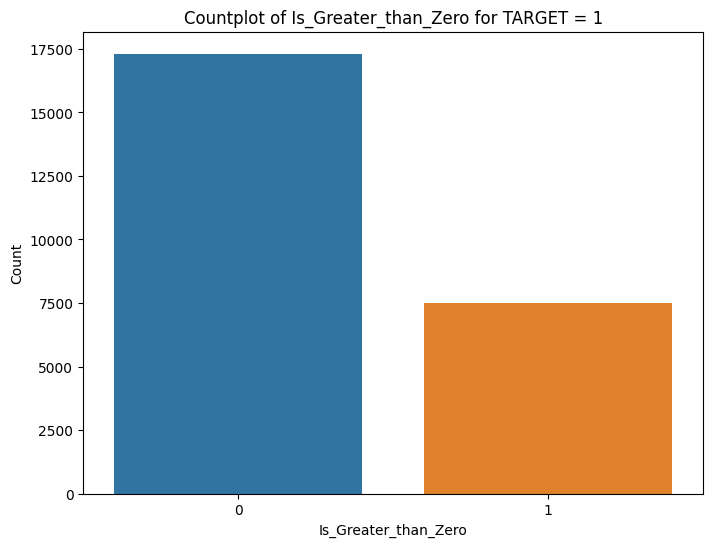

In [ ]:
merged_df['Is_Greater_than_Zero'] = merged_df['Count_Greater_than_Zero'].apply(lambda x: 1 if x > 0 else 0)

# Filter rows where TARGET = 1 and create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Greater_than_Zero', data=merged_df[merged_df['TARGET'] == 1])
plt.title('Countplot of Is_Greater_than_Zero for TARGET = 1')
plt.xlabel('Is_Greater_than_Zero')
plt.ylabel('Count')
plt.show()

Agregasi dengan: <br>
Sum Count<br>
Average Min_MONTHS_BALANCE<br>
Sum per kolom STATUS<br>
Majority voting STATUS<br>

In [ ]:
aggregation_functions = {
    'Count': 'sum',
    'Min_MONTHS_BALANCE': 'mean',
    'STATUS_0': 'sum',
    'STATUS_1': 'sum',
    'STATUS_2': 'sum',
    'STATUS_3': 'sum',
    'STATUS_4': 'sum',
    'STATUS_5': 'sum',
    'STATUS_C': 'sum',
    'STATUS_X': 'sum'
}
aggregated_df = merged_bureau.groupby('SK_ID_CURR').agg(aggregation_functions).reset_index()
status_columns = ['STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X']
aggregated_df['MAX_STATUS'] = aggregated_df[status_columns].idxmax(axis=1)

In [ ]:
aggregated_df

,SK_ID_CURR,Count,Min_MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MAX_STATUS
0,100001,172.0,-23.571429,31.0,1.0,0.0,0.0,0.0,0.0,110.0,30.0,STATUS_C
1,100002,110.0,-28.250000,45.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0,STATUS_0
2,100003,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STATUS_0
3,100004,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STATUS_0
4,100005,21.0,-6.000000,14.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,STATUS_0
...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STATUS_0
305807,456250,87.0,-28.000000,12.0,0.0,0.0,0.0,0.0,0.0,25.0,50.0,STATUS_X
305808,456253,117.0,-28.250000,47.0,0.0,0.0,0.0,0.0,0.0,57.0,13.0,STATUS_C
305809,456254,37.0,-36.000000,8.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,STATUS_C


In [ ]:
aggregated_df.to_csv('aggregated_merged_bureau.csv')

#Exploration and Preprocessing - Previous Application Data

In [ ]:
previous_application = pd.read_csv('previous_application.csv')

## Exploration

In [ ]:
previous_application.sort_values(by=['SK_ID_CURR'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814647,1296007,456255,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,14,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
214743,1743609,456255,Consumer loans,11090.835,102037.5,112815.0,0.0,102037.5,THURSDAY,18,...,Furniture,12.0,middle,POS industry with interest,365243.0,-960.0,-630.0,-690.0,-687.0,0.0
1411592,2729207,456255,Consumer loans,11514.555,58225.5,58545.0,5823.0,58225.5,FRIDAY,18,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0
608510,2073384,456255,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0


In [ ]:
previous_application.duplicated(subset=['SK_ID_CURR']).sum()

1331357

In [ ]:
for column in previous_application.columns:
    print(f"{column}: {previous_application[column].isnull().sum()}")

SK_ID_PREV: 0
SK_ID_CURR: 0
NAME_CONTRACT_TYPE: 0
AMT_ANNUITY: 372235
AMT_APPLICATION: 0
AMT_CREDIT: 1
AMT_DOWN_PAYMENT: 895844
AMT_GOODS_PRICE: 385515
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 0
FLAG_LAST_APPL_PER_CONTRACT: 0
NFLAG_LAST_APPL_IN_DAY: 0
RATE_DOWN_PAYMENT: 895844
RATE_INTEREST_PRIMARY: 1664263
RATE_INTEREST_PRIVILEGED: 1664263
NAME_CASH_LOAN_PURPOSE: 0
NAME_CONTRACT_STATUS: 0
DAYS_DECISION: 0
NAME_PAYMENT_TYPE: 0
CODE_REJECT_REASON: 0
NAME_TYPE_SUITE: 820405
NAME_CLIENT_TYPE: 0
NAME_GOODS_CATEGORY: 0
NAME_PORTFOLIO: 0
NAME_PRODUCT_TYPE: 0
CHANNEL_TYPE: 0
SELLERPLACE_AREA: 0
NAME_SELLER_INDUSTRY: 0
CNT_PAYMENT: 372230
NAME_YIELD_GROUP: 0
PRODUCT_COMBINATION: 346
DAYS_FIRST_DRAWING: 673065
DAYS_FIRST_DUE: 673065
DAYS_LAST_DUE_1ST_VERSION: 673065
DAYS_LAST_DUE: 673065
DAYS_TERMINATION: 673065
NFLAG_INSURED_ON_APPROVAL: 673065


In [ ]:
for column in previous_application.columns:
    print(f"{column}: {len(previous_application[previous_application[column] == 0])}")

SK_ID_PREV: 0
SK_ID_CURR: 0
NAME_CONTRACT_TYPE: 0
AMT_ANNUITY: 1637
AMT_APPLICATION: 392402
AMT_CREDIT: 336768
AMT_DOWN_PAYMENT: 369854
AMT_GOODS_PRICE: 6869
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 109
FLAG_LAST_APPL_PER_CONTRACT: 0
NFLAG_LAST_APPL_IN_DAY: 5900
RATE_DOWN_PAYMENT: 369854
RATE_INTEREST_PRIMARY: 0
RATE_INTEREST_PRIVILEGED: 0
NAME_CASH_LOAN_PURPOSE: 0
NAME_CONTRACT_STATUS: 0
DAYS_DECISION: 0
NAME_PAYMENT_TYPE: 0
CODE_REJECT_REASON: 0
NAME_TYPE_SUITE: 0
NAME_CLIENT_TYPE: 0
NAME_GOODS_CATEGORY: 0
NAME_PORTFOLIO: 0
NAME_PRODUCT_TYPE: 0
CHANNEL_TYPE: 0
SELLERPLACE_AREA: 60523
NAME_SELLER_INDUSTRY: 0
CNT_PAYMENT: 144985
NAME_YIELD_GROUP: 0
PRODUCT_COMBINATION: 0
DAYS_FIRST_DRAWING: 0
DAYS_FIRST_DUE: 0
DAYS_LAST_DUE_1ST_VERSION: 705
DAYS_LAST_DUE: 0
DAYS_TERMINATION: 0
NFLAG_INSURED_ON_APPROVAL: 665527


In [ ]:
previous_application.head(1000).to_excel('previous_application_1000.xlsx')

NAME_CONTRACT_TYPE count per category + majority voting<br>
AMT_ANNUITY count where > 0 + average where > 0<br>
AMT_APPLICATION count where > 0 + average where > 0<br>
AMT_CREDIT count where > 0 + average where > 0<br>
CREDIT_DIFFERENCE = AMT_APPLICATION - AMT_CREDIT<br>
AMT_DOWN_PAYMENT count where > 0 + average where > 0<br>
AMT_GOODS_PRICE count where > 0 + average where > 0<br>
FLAG_LAST_APPL_PER_CONTRACT count per category + majority voting<br>
RATE_DOWN_PAYMENT count where > 0 + average where > 0<br>
RATE_INTEREST_PRIMARY count where > 0 + average where > 0<br>
RATE_INTEREST_PRIVILEGED count where > 0 + average where > 0<br>
NAME_CASH_LOAN_PURPOSE count per category + majority voting<br>
NAME_CONTRACT_STATUS count per category + majority voting<br>
DAYS_DECISION count where > 0 + average where > 0<br>
NAME_PAYMENT_TYPE count per category + majority voting<br>
CODE_REJECT_REASON count per category + majority voting<br>
NAME_TYPE_SUITE count per category + majority voting<br>
NAME_CLIENT_TYPE count per category + majority voting<br>
NAME_GOODS_CATEGORY count per category + majority voting<br>
NAME_PORTFOLIO count per category + majority voting<br>
NAME_PRODUCT_TYPE count per category + majority voting<br>
CHANNEL_TYPE count per category + majority voting<br>
SELLERPLACE_AREA count where > 0 + average where > 0<br>
NAME_SELLER_INDUSTRY count per category + majority voting<br>
CNT_PAYMENT count where > 0 + average where > 0<br>
NAME_YIELD_GROUP count per category + majority voting<br>
PRODUCT_COMBINATION count per category + majority voting<br>
DAYS_FIRST_DRAWING count where > 0 + average where > 0<br>
DAYS_FIRST_DUE count where > 0 + average where > 0<br>
DAYS_LAST_DUE_1ST_VERSION count where > 0 + average where > 0<br>
DAYS_LAST_DUE count where > 0 + average where > 0<br>
DAYS_TERMINATION count where > 0 + average where > 0<br>
NFLAG_INSURED_ON_APPROVAL count per category + majority voting<br>


In [ ]:
#columns_to_replace = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
#previous_application[columns_to_replace] = previous_application[columns_to_replace].replace(365243, 0)

## Agregasi dengan count where > 0 + average where > 0

In [ ]:
result_df = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_APPLICATION': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_CREDIT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_DOWN_PAYMENT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'AMT_GOODS_PRICE': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'RATE_DOWN_PAYMENT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'RATE_INTEREST_PRIMARY': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'RATE_INTEREST_PRIVILEGED': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'SELLERPLACE_AREA': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())],
    'CNT_PAYMENT': [('Count_Greater_than_Zero', lambda x: (x > 0).sum()), ('Average_Greater_than_Zero', lambda x: x[x > 0].mean())]
}).reset_index()

In [ ]:
result_df.columns = ['SK_ID_CURR'] + [f'{col[0]}_{col[1]}' for col in result_df.columns[1:]]

In [ ]:
result_df

,SK_ID_CURR,AMT_ANNUITY_Count_Greater_than_Zero,AMT_ANNUITY_Average_Greater_than_Zero,AMT_APPLICATION_Count_Greater_than_Zero,AMT_APPLICATION_Average_Greater_than_Zero,AMT_CREDIT_Count_Greater_than_Zero,AMT_CREDIT_Average_Greater_than_Zero,AMT_DOWN_PAYMENT_Count_Greater_than_Zero,AMT_DOWN_PAYMENT_Average_Greater_than_Zero,AMT_GOODS_PRICE_Count_Greater_than_Zero,...,RATE_DOWN_PAYMENT_Count_Greater_than_Zero,RATE_DOWN_PAYMENT_Average_Greater_than_Zero,RATE_INTEREST_PRIMARY_Count_Greater_than_Zero,RATE_INTEREST_PRIMARY_Average_Greater_than_Zero,RATE_INTEREST_PRIVILEGED_Count_Greater_than_Zero,RATE_INTEREST_PRIVILEGED_Average_Greater_than_Zero,SELLERPLACE_AREA_Count_Greater_than_Zero,SELLERPLACE_AREA_Average_Greater_than_Zero,CNT_PAYMENT_Count_Greater_than_Zero,CNT_PAYMENT_Average_Greater_than_Zero
0,100001,1,3951.000000,1,24835.500,1,23787.00,1,2520.00,1,...,1,0.104326,0,NaN,0,NaN,1,23.0,1,8.000000
1,100002,1,9251.775000,1,179055.000,1,179055.00,0,NaN,1,...,0,NaN,0,NaN,0,NaN,1,500.0,1,24.000000
2,100003,3,56553.990000,3,435436.500,3,484191.00,1,6885.00,3,...,1,0.100061,0,NaN,0,NaN,2,800.0,3,10.000000
3,100004,1,5357.250000,1,24282.000,1,20106.00,1,4860.00,1,...,1,0.212008,0,NaN,0,NaN,1,30.0,1,4.000000
4,100005,1,4813.200000,1,44617.500,1,40153.50,1,4464.00,1,...,1,0.108964,0,NaN,0,NaN,1,37.0,1,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,1,6605.910000,1,40455.000,1,40455.00,0,NaN,1,...,0,NaN,0,NaN,0,NaN,1,30.0,1,8.000000
338853,456252,1,10074.465000,1,57595.500,1,56821.50,1,3456.00,1,...,1,0.062443,0,NaN,0,NaN,1,190.0,1,6.000000
338854,456253,2,4770.405000,2,24162.750,2,20625.75,2,4403.25,2,...,2,0.214316,0,NaN,0,NaN,2,22.0,2,5.000000
338855,456254,2,10681.132500,2,121317.750,2,134439.75,0,NaN,2,...,0,NaN,0,NaN,0,NaN,2,1578.0,2,15.000000


In [ ]:
result_df.to_excel('average_previous_applications.xlsx')

## Agregasi dengan count per category + majority voting

In [ ]:
columns_to_process = ['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
                      'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
                      'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
                      'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
                      'NFLAG_INSURED_ON_APPROVAL']

In [ ]:
result_df2 = previous_application[['SK_ID_CURR']]

In [ ]:
for column in columns_to_process:
  count_per_category = previous_application.groupby(['SK_ID_CURR', column]).size().unstack(fill_value=0)
  count_per_category.reset_index(inplace=True)
  count_per_category.columns.name = None
  count_per_category.columns = ['SK_ID_CURR'] + [f'{column}_{category}' for category in count_per_category.columns[1:]]
  count_per_category[f'majority_{column}'] = count_per_category.iloc[:, 1:].idxmax(axis=1).str.split('_').str[-1]
  result_df2 = result_df2.merge(count_per_category, on='SK_ID_CURR', how='outer')

In [ ]:
result_df2 = result_df2.drop_duplicates(subset=['SK_ID_CURR'])

In [ ]:
result_df2

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,majority_NAME_CONTRACT_TYPE,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,majority_FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,...,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,majority_PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL_0.0,NFLAG_INSURED_ON_APPROVAL_1.0,majority_NFLAG_INSURED_ON_APPROVAL
0,271877,0,3,0,0,Consumer loans,0,3,Y,0,...,2,0,1,0,0,0,POS industry with interest,2.0,0.0,0.0
3,108129,2,3,1,0,Consumer loans,0,6,Y,0,...,2,0,0,0,0,0,Cash X-Sell: low,4.0,2.0,0.0
9,122040,2,1,1,0,Cash loans,0,4,Y,0,...,0,0,0,0,0,0,Card Street,1.0,2.0,1.0
13,176158,22,1,0,0,Cash loans,0,23,Y,0,...,0,0,0,0,0,0,Cash Street: high,1.0,5.0,1.0
36,202054,18,6,1,0,Cash loans,0,25,Y,0,...,0,0,1,0,0,0,Cash,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,239799,0,1,0,0,Consumer loans,0,1,Y,0,...,1,0,0,0,0,0,POS industry with interest,1.0,0.0,0.0
1670210,174832,1,0,0,0,Cash loans,0,1,Y,0,...,0,0,0,0,0,0,Cash X-Sell: middle,0.0,1.0,1.0
1670211,253940,1,0,0,0,Cash loans,0,1,Y,0,...,0,0,0,0,0,0,Cash Street: high,1.0,0.0,0.0
1670212,353284,0,1,0,0,Consumer loans,0,1,Y,0,...,0,0,0,0,0,0,POS household without interest,1.0,0.0,0.0


In [ ]:
result_df2.to_csv('categories_previous_application.csv')

## Agregasi "DAYS"

Perbaiki kolom numerikal dengan nilai negatif:
DAYS_DECISION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION

In [ ]:
columns_to_process = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
                      'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [ ]:
previous_application_modified = previous_application.copy()
previous_application_modified[columns_to_process] = previous_application[columns_to_process].replace(365243, np.nan)

In [ ]:
min_values = previous_application_modified[columns_to_process].min()
max_values = previous_application_modified[columns_to_process].max()

In [ ]:
min_values

DAYS_DECISION               -2922.0
DAYS_FIRST_DRAWING          -2922.0
DAYS_FIRST_DUE              -2892.0
DAYS_LAST_DUE_1ST_VERSION   -2801.0
DAYS_LAST_DUE               -2889.0
DAYS_TERMINATION            -2874.0
dtype: float64

In [ ]:
max_values

DAYS_DECISION                  -1.0
DAYS_FIRST_DRAWING             -2.0
DAYS_FIRST_DUE                 -2.0
DAYS_LAST_DUE_1ST_VERSION    2389.0
DAYS_LAST_DUE                  -2.0
DAYS_TERMINATION               -2.0
dtype: float64

In [ ]:
days_decision = previous_application[previous_application['DAYS_DECISION'] < 0].groupby('SK_ID_CURR').size().reset_index(name='COUNT_DAYS_DECISION')

In [ ]:
days_decision

,SK_ID_CURR,COUNT_DAYS_DECISION
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
338852,456251,1
338853,456252,1
338854,456253,2
338855,456254,2


In [ ]:
result_df = previous_application.groupby('SK_ID_CURR').agg({
    'DAYS_DECISION': [('Average_Less_than_Zero', lambda x: x[x < 0].mean())]
}).reset_index()

In [ ]:
result_df.columns = ['SK_ID_CURR'] + [f'{col[0]}_{col[1]}' for col in result_df.columns[1:]]

In [ ]:
result_df

,SK_ID_CURR,DAYS_DECISION_Average_Less_than_Zero
0,100001,-1740.000
1,100002,-606.000
2,100003,-1305.000
3,100004,-815.000
4,100005,-536.000
...,...,...
338852,456251,-273.000
338853,456252,-2497.000
338854,456253,-2380.000
338855,456254,-299.500


In [ ]:
columns_to_process = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
count_per_id = previous_application.groupby('SK_ID_CURR')[columns_to_process].apply(lambda x: (x == 365243).sum())

In [ ]:
count_per_id = count_per_id.reset_index()

In [ ]:
count_per_id.columns = ['SK_ID_CURR'] + [f'{col}_OUTLIER_COUNT' for col in count_per_id.columns[1:]]

In [ ]:
count_per_id

,SK_ID_CURR,DAYS_FIRST_DRAWING_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_FIRST_DUE_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_LAST_DUE_1ST_VERSION_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_LAST_DUE_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_TERMINATION_OUTLIER_COUNT_OUTLIER_COUNT
0,100001,1,0,0,0,0
1,100002,1,0,0,0,0
2,100003,3,0,0,0,0
3,100004,1,0,0,0,0
4,100005,1,0,0,0,0
...,...,...,...,...,...,...
338852,456251,1,0,0,0,0
338853,456252,1,0,0,0,0
338854,456253,2,0,0,0,0
338855,456254,2,0,0,2,2


In [ ]:
columns_to_process = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
result_df_2 = previous_application_modified.groupby('SK_ID_CURR')[columns_to_process].agg(['count', 'mean']).reset_index()
result_df_2.columns = [f'{col}_{agg}' for col, agg in result_df_2.columns]
result_df_2

,SK_ID_CURR_,DAYS_FIRST_DRAWING_count,DAYS_FIRST_DRAWING_mean,DAYS_FIRST_DUE_count,DAYS_FIRST_DUE_mean,DAYS_LAST_DUE_1ST_VERSION_count,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_count,DAYS_LAST_DUE_mean,DAYS_TERMINATION_count,DAYS_TERMINATION_mean
0,100001,0,NaN,1,-1709.000000,1,-1499.000000,1,-1619.000000,1,-1612.000000
1,100002,0,NaN,1,-565.000000,1,125.000000,1,-25.000000,1,-17.000000
2,100003,0,NaN,3,-1274.333333,3,-1004.333333,3,-1054.333333,3,-1047.333333
3,100004,0,NaN,1,-784.000000,1,-694.000000,1,-724.000000,1,-714.000000
4,100005,0,NaN,1,-706.000000,1,-376.000000,1,-466.000000,1,-460.000000
...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,0,NaN,1,-210.000000,1,0.000000,1,-30.000000,1,-25.000000
338853,456252,0,NaN,1,-2466.000000,1,-2316.000000,1,-2316.000000,1,-2311.000000
338854,456253,0,NaN,2,-2339.000000,2,-2219.000000,2,-2219.000000,2,-2212.500000
338855,456254,0,NaN,2,-269.000000,2,151.000000,0,NaN,0,NaN


In [ ]:
result_df_2 = result_df_2.rename(columns={"SK_ID_CURR_": "SK_ID_CURR"})
result_df_2

,SK_ID_CURR,DAYS_FIRST_DRAWING_count,DAYS_FIRST_DRAWING_mean,DAYS_FIRST_DUE_count,DAYS_FIRST_DUE_mean,DAYS_LAST_DUE_1ST_VERSION_count,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_count,DAYS_LAST_DUE_mean,DAYS_TERMINATION_count,DAYS_TERMINATION_mean
0,100001,0,NaN,1,-1709.000000,1,-1499.000000,1,-1619.000000,1,-1612.000000
1,100002,0,NaN,1,-565.000000,1,125.000000,1,-25.000000,1,-17.000000
2,100003,0,NaN,3,-1274.333333,3,-1004.333333,3,-1054.333333,3,-1047.333333
3,100004,0,NaN,1,-784.000000,1,-694.000000,1,-724.000000,1,-714.000000
4,100005,0,NaN,1,-706.000000,1,-376.000000,1,-466.000000,1,-460.000000
...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,0,NaN,1,-210.000000,1,0.000000,1,-30.000000,1,-25.000000
338853,456252,0,NaN,1,-2466.000000,1,-2316.000000,1,-2316.000000,1,-2311.000000
338854,456253,0,NaN,2,-2339.000000,2,-2219.000000,2,-2219.000000,2,-2212.500000
338855,456254,0,NaN,2,-269.000000,2,151.000000,0,NaN,0,NaN


In [ ]:
DAYS_previous_application = days_decision.merge(result_df, on='SK_ID_CURR', how='outer')

In [ ]:
DAYS_previous_application = DAYS_previous_application.merge(count_per_id, on='SK_ID_CURR', how='outer')

In [ ]:
DAYS_previous_application = DAYS_previous_application.merge(result_df_2, on='SK_ID_CURR', how='outer')

In [ ]:
DAYS_previous_application

,SK_ID_CURR,COUNT_DAYS_DECISION,DAYS_DECISION_Average_Less_than_Zero,DAYS_FIRST_DRAWING_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_FIRST_DUE_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_LAST_DUE_1ST_VERSION_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_LAST_DUE_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_TERMINATION_OUTLIER_COUNT_OUTLIER_COUNT,DAYS_FIRST_DRAWING_count,DAYS_FIRST_DRAWING_mean,DAYS_FIRST_DUE_count,DAYS_FIRST_DUE_mean,DAYS_LAST_DUE_1ST_VERSION_count,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_count,DAYS_LAST_DUE_mean,DAYS_TERMINATION_count,DAYS_TERMINATION_mean
0,100001,1,-1740.000,1,0,0,0,0,0,NaN,1,-1709.000000,1,-1499.000000,1,-1619.000000,1,-1612.000000
1,100002,1,-606.000,1,0,0,0,0,0,NaN,1,-565.000000,1,125.000000,1,-25.000000,1,-17.000000
2,100003,3,-1305.000,3,0,0,0,0,0,NaN,3,-1274.333333,3,-1004.333333,3,-1054.333333,3,-1047.333333
3,100004,1,-815.000,1,0,0,0,0,0,NaN,1,-784.000000,1,-694.000000,1,-724.000000,1,-714.000000
4,100005,2,-536.000,1,0,0,0,0,0,NaN,1,-706.000000,1,-376.000000,1,-466.000000,1,-460.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,1,-273.000,1,0,0,0,0,0,NaN,1,-210.000000,1,0.000000,1,-30.000000,1,-25.000000
338853,456252,1,-2497.000,1,0,0,0,0,0,NaN,1,-2466.000000,1,-2316.000000,1,-2316.000000,1,-2311.000000
338854,456253,2,-2380.000,2,0,0,0,0,0,NaN,2,-2339.000000,2,-2219.000000,2,-2219.000000,2,-2212.500000
338855,456254,2,-299.500,2,0,0,2,2,0,NaN,2,-269.000000,2,151.000000,0,NaN,0,NaN


In [ ]:
DAYS_previous_application.to_csv('DAYS_previous_application.csv')

In [ ]:
average_previous_applications = pd.read_excel('average_previous_applications.xlsx')

In [ ]:
categories_previous_application = pd.read_csv('categories_previous_application.csv')

In [ ]:
aggregated_previous_application = DAYS_previous_application.merge(average_previous_applications, on='SK_ID_CURR', how='outer')

In [ ]:
aggregated_previous_application = aggregated_previous_application.merge(categories_previous_application, on='SK_ID_CURR', how='outer')

In [ ]:
aggregated_previous_application.to_csv('aggregated_previous_application.csv')

# Exploration and Preprocessing - POS Cash Balance Data


In [ ]:
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')

In [ ]:
pos_cash_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [ ]:
pos_cash_balance.duplicated(subset=['SK_ID_CURR']).sum()

9664106

In [ ]:
pos_cash_balance.duplicated(subset=['SK_ID_PREV']).sum()

9065033

In [ ]:
len(pd.unique(pos_cash_balance['SK_ID_CURR']))

337252

In [ ]:
pos_cash_balance.sort_values(by=['SK_ID_PREV'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
6030662,1000001,158271,-10,12.0,12.0,Active,0,0
8470736,1000001,158271,-9,12.0,11.0,Active,0,0
2658581,1000002,101962,-51,6.0,1.0,Active,0,0
2549591,1000002,101962,-52,6.0,2.0,Active,0,0
...,...,...,...,...,...,...,...,...
5673963,2843499,314148,-37,60.0,57.0,Active,0,0
5580339,2843499,314148,-31,10.0,0.0,Active,0,0
5675189,2843499,314148,-34,60.0,54.0,Active,0,0
8600392,2843499,314148,-30,10.0,0.0,Completed,0,0


In [ ]:
pos_cash_balance.sort_values(by=['SK_ID_PREV']).head(30)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
6030662,1000001,158271,-10,12.0,12.0,Active,0,0
8470736,1000001,158271,-9,12.0,11.0,Active,0,0
2658581,1000002,101962,-51,6.0,1.0,Active,0,0
2549591,1000002,101962,-52,6.0,2.0,Active,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
4467804,1000002,101962,-54,4.0,4.0,Active,0,0
3346102,1000002,101962,-53,6.0,3.0,Active,0,0
6496374,1000003,252457,-3,12.0,11.0,Active,0,0
6584537,1000003,252457,-4,12.0,12.0,Active,0,0


In [ ]:
pos_cash_balance.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

MONTHS_BALANCE: berbanding terbalik dengan CNT_INSTALMENT_FUTURE<br>
CNT_INSTALMENT: kadang-kadang berubah pada pinjaman yang sama, biasanya tetap sama <br>
CNT_INSTALMENT_FUTURE: 0 berarti cicilan selesai, berbanding terbalik dengan MONTHS_BALANCE	<br>

## Agregasi data

Fitur yang bisa didapatkan: <br>
Maksimum dan mean durasi pinjaman (mean(max(CNT_INSTALMENT_FUTURE) per SK_ID_PREV) per SK_ID_CURR) <br>
Jumlah pinjaman point of sales (count(SK_ID_PREV) per SK_ID_CURR) <br>
Count untuk setiap kategori pada NAME_CONTRACT_STATUS, jumlahkan untuk SK_ID_CURR <br>
Maksimum dan mean hari telat bayar (agregasi max(SK_DPD) per SK_ID_PREV kemudian agregasi max dan mean per SK_ID_CURR, lakukan juga untuk SK_DPD_DEF)

In [ ]:
column = 'NAME_CONTRACT_STATUS'
count_per_category = pos_cash_balance.groupby(['SK_ID_CURR', column]).size().unstack(fill_value=0)
count_per_category.reset_index(inplace=True)
count_per_category.columns.name = None
count_per_category.columns = ['SK_ID_CURR'] + [f'{column}_{category}' for category in count_per_category.columns[1:]]

In [ ]:
count_per_category

,SK_ID_CURR,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,100001,7,0,0,0,2,0,0,0,0
1,100002,19,0,0,0,0,0,0,0,0
2,100003,26,0,0,0,2,0,0,0,0
3,100004,3,0,0,0,1,0,0,0,0
4,100005,9,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
337247,456251,7,0,0,0,1,0,0,1,0
337248,456252,6,0,0,0,1,0,0,0,0
337249,456253,15,0,0,0,2,0,0,0,0
337250,456254,20,0,0,0,0,0,0,0,0


In [ ]:
pos_counts = pos_cash_balance.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
pos_counts.columns = ['SK_ID_CURR', 'unique_SK_ID_PREV_count']

In [ ]:
pos_counts

,SK_ID_CURR,unique_SK_ID_PREV_count
0,100001,2
1,100002,1
2,100003,3
3,100004,1
4,100005,1
...,...,...
337247,456251,1
337248,456252,1
337249,456253,3
337250,456254,2


In [ ]:
mean_loan_duration = pos_cash_balance.groupby('SK_ID_PREV')['CNT_INSTALMENT_FUTURE'].max().reset_index()
mean_loan_duration.columns = ['SK_ID_PREV', 'max_CNT_INSTALMENT_FUTURE']
mean_loan_duration

,SK_ID_PREV,max_CNT_INSTALMENT_FUTURE
0,1000001,12.0
1,1000002,4.0
2,1000003,12.0
3,1000004,10.0
4,1000005,10.0
...,...,...
936320,2843494,48.0
936321,2843495,60.0
936322,2843497,24.0
936323,2843498,36.0


In [ ]:
mean_loan_duration = mean_loan_duration.merge(pos_cash_balance[['SK_ID_CURR','SK_ID_PREV']],on='SK_ID_PREV',how='left')

In [ ]:
mean_loan_duration = mean_loan_duration.drop_duplicates(subset=['SK_ID_PREV'])

In [ ]:
mean_loan_duration

,SK_ID_PREV,max_CNT_INSTALMENT_FUTURE,SK_ID_CURR
0,1000001,12.0,158271
3,1000002,4.0,101962
8,1000003,12.0,252457
12,1000004,10.0,260094
20,1000005,10.0,176456
...,...,...,...
10001308,2843494,48.0,292375
10001311,2843495,60.0,260963
10001319,2843497,24.0,451578
10001340,2843498,36.0,393881


In [ ]:
max_loan_duration = mean_loan_duration.groupby('SK_ID_CURR')['max_CNT_INSTALMENT_FUTURE'].max().reset_index()

In [ ]:
max_loan_duration

,SK_ID_CURR,max_CNT_INSTALMENT_FUTURE
0,100001,4.0
1,100002,24.0
2,100003,12.0
3,100004,4.0
4,100005,12.0
...,...,...
337247,456251,8.0
337248,456252,6.0
337249,456253,6.0
337250,456254,16.0


In [ ]:
mean_loan_duration = mean_loan_duration.groupby('SK_ID_CURR')['max_CNT_INSTALMENT_FUTURE'].mean().reset_index()

In [ ]:
mean_loan_duration = mean_loan_duration.rename(columns={"max_CNT_INSTALMENT_FUTURE":"mean_max_CNT_INSTALMENT_FUTURE"})

In [ ]:
mean_loan_duration

,SK_ID_CURR,mean_max_CNT_INSTALMENT_FUTURE
0,100001,3.0
1,100002,24.0
2,100003,10.0
3,100004,4.0
4,100005,12.0
...,...,...
337247,456251,8.0
337248,456252,6.0
337249,456253,4.0
337250,456254,15.0


In [ ]:
loan_duration = max_loan_duration.merge(mean_loan_duration,on='SK_ID_CURR')
loan_duration

,SK_ID_CURR,max_CNT_INSTALMENT_FUTURE,mean_max_CNT_INSTALMENT_FUTURE
0,100001,4.0,3.0
1,100002,24.0,24.0
2,100003,12.0,10.0
3,100004,4.0,4.0
4,100005,12.0,12.0
...,...,...,...
337247,456251,8.0,8.0
337248,456252,6.0,6.0
337249,456253,6.0,4.0
337250,456254,16.0,15.0


In [ ]:
min_values = pos_cash_balance[['SK_DPD', 'SK_DPD_DEF']].min()
max_values = pos_cash_balance[['SK_DPD', 'SK_DPD_DEF']].max()

In [ ]:
min_values

SK_DPD        0
SK_DPD_DEF    0
dtype: int64

In [ ]:
max_values

SK_DPD        4231
SK_DPD_DEF    3595
dtype: int64

In [ ]:
mean_loan_lateness = pos_cash_balance.groupby('SK_ID_PREV')['SK_DPD'].max().reset_index()
mean_loan_lateness.columns = ['SK_ID_PREV', 'max_SK_DPD']
mean_loan_lateness = mean_loan_lateness.merge(pos_cash_balance[['SK_ID_CURR','SK_ID_PREV']],on='SK_ID_PREV',how='left')
mean_loan_lateness = mean_loan_lateness.drop_duplicates(subset=['SK_ID_PREV'])
mean_loan_lateness

,SK_ID_PREV,max_SK_DPD,SK_ID_CURR
0,1000001,0,158271
3,1000002,0,101962
8,1000003,0,252457
12,1000004,0,260094
20,1000005,0,176456
...,...,...,...
10001308,2843494,0,292375
10001311,2843495,0,260963
10001319,2843497,0,451578
10001340,2843498,0,393881


In [ ]:
max_loan_lateness = mean_loan_lateness.groupby('SK_ID_CURR')['max_SK_DPD'].max().reset_index()
mean_loan_lateness = mean_loan_lateness.groupby('SK_ID_CURR')['max_SK_DPD'].mean().reset_index()
mean_loan_lateness = mean_loan_lateness.rename(columns={"max_SK_DPD":"mean_max_SK_DPD"})

In [ ]:
loan_lateness = max_loan_lateness.merge(mean_loan_lateness,on='SK_ID_CURR')
loan_lateness

,SK_ID_CURR,max_SK_DPD,mean_max_SK_DPD
0,100001,7,3.500000
1,100002,0,0.000000
2,100003,0,0.000000
3,100004,0,0.000000
4,100005,0,0.000000
...,...,...,...
337247,456251,0,0.000000
337248,456252,0,0.000000
337249,456253,5,1.666667
337250,456254,0,0.000000


In [ ]:
mean_loan_lateness_DEF = pos_cash_balance.groupby('SK_ID_PREV')['SK_DPD_DEF'].max().reset_index()
mean_loan_lateness_DEF.columns = ['SK_ID_PREV', 'max_SK_DPD_DEF']
mean_loan_lateness_DEF = mean_loan_lateness_DEF.merge(pos_cash_balance[['SK_ID_CURR','SK_ID_PREV']],on='SK_ID_PREV',how='left')
mean_loan_lateness_DEF = mean_loan_lateness_DEF.drop_duplicates(subset=['SK_ID_PREV'])
mean_loan_lateness_DEF

,SK_ID_PREV,max_SK_DPD_DEF,SK_ID_CURR
0,1000001,0,158271
3,1000002,0,101962
8,1000003,0,252457
12,1000004,0,260094
20,1000005,0,176456
...,...,...,...
10001308,2843494,0,292375
10001311,2843495,0,260963
10001319,2843497,0,451578
10001340,2843498,0,393881


In [ ]:
max_loan_lateness_DEF = mean_loan_lateness_DEF.groupby('SK_ID_CURR')['max_SK_DPD_DEF'].max().reset_index()
mean_loan_lateness_DEF = mean_loan_lateness_DEF.groupby('SK_ID_CURR')['max_SK_DPD_DEF'].mean().reset_index()
mean_loan_lateness_DEF = mean_loan_lateness_DEF.rename(columns={"max_SK_DPD_DEF":"mean_max_SK_DPD_DEF"})

In [ ]:
loan_lateness_DEF = max_loan_lateness_DEF.merge(mean_loan_lateness_DEF,on='SK_ID_CURR')
loan_lateness_DEF

,SK_ID_CURR,max_SK_DPD_DEF,mean_max_SK_DPD_DEF
0,100001,7,3.500000
1,100002,0,0.000000
2,100003,0,0.000000
3,100004,0,0.000000
4,100005,0,0.000000
...,...,...,...
337247,456251,0,0.000000
337248,456252,0,0.000000
337249,456253,5,1.666667
337250,456254,0,0.000000


In [ ]:
aggregated_pos_cash_balance = count_per_category.merge(pos_counts,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_pos_cash_balance = aggregated_pos_cash_balance.merge(loan_duration,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_pos_cash_balance = aggregated_pos_cash_balance.merge(loan_lateness,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_pos_cash_balance = aggregated_pos_cash_balance.merge(loan_lateness_DEF,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_pos_cash_balance

,SK_ID_CURR,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,unique_SK_ID_PREV_count,max_CNT_INSTALMENT_FUTURE,mean_max_CNT_INSTALMENT_FUTURE,max_SK_DPD,mean_max_SK_DPD,max_SK_DPD_DEF,mean_max_SK_DPD_DEF
0,100001,7,0,0,0,2,0,0,0,0,2,4.0,3.0,7,3.500000,7,3.500000
1,100002,19,0,0,0,0,0,0,0,0,1,24.0,24.0,0,0.000000,0,0.000000
2,100003,26,0,0,0,2,0,0,0,0,3,12.0,10.0,0,0.000000,0,0.000000
3,100004,3,0,0,0,1,0,0,0,0,1,4.0,4.0,0,0.000000,0,0.000000
4,100005,9,0,0,0,1,0,0,1,0,1,12.0,12.0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,7,0,0,0,1,0,0,1,0,1,8.0,8.0,0,0.000000,0,0.000000
337248,456252,6,0,0,0,1,0,0,0,0,1,6.0,6.0,0,0.000000,0,0.000000
337249,456253,15,0,0,0,2,0,0,0,0,3,6.0,4.0,5,1.666667,5,1.666667
337250,456254,20,0,0,0,0,0,0,0,0,2,16.0,15.0,0,0.000000,0,0.000000


In [ ]:
aggregated_pos_cash_balance.to_csv('aggregated_pos_cash_balance.csv')

# Exploration and Preprocessing - Credit Card Balance Data

In [ ]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [ ]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [ ]:
credit_card_balance.duplicated(subset=['SK_ID_CURR']).sum()

3736754

In [ ]:
credit_card_balance.duplicated(subset=['SK_ID_PREV']).sum()

3736005

In [ ]:
for column in credit_card_balance.columns:
    print(f"{column}: {credit_card_balance[column].isnull().sum()}")

SK_ID_PREV: 0
SK_ID_CURR: 0
MONTHS_BALANCE: 0
AMT_BALANCE: 0
AMT_CREDIT_LIMIT_ACTUAL: 0
AMT_DRAWINGS_ATM_CURRENT: 749816
AMT_DRAWINGS_CURRENT: 0
AMT_DRAWINGS_OTHER_CURRENT: 749816
AMT_DRAWINGS_POS_CURRENT: 749816
AMT_INST_MIN_REGULARITY: 305236
AMT_PAYMENT_CURRENT: 767988
AMT_PAYMENT_TOTAL_CURRENT: 0
AMT_RECEIVABLE_PRINCIPAL: 0
AMT_RECIVABLE: 0
AMT_TOTAL_RECEIVABLE: 0
CNT_DRAWINGS_ATM_CURRENT: 749816
CNT_DRAWINGS_CURRENT: 0
CNT_DRAWINGS_OTHER_CURRENT: 749816
CNT_DRAWINGS_POS_CURRENT: 749816
CNT_INSTALMENT_MATURE_CUM: 305236
NAME_CONTRACT_STATUS: 0
SK_DPD: 0
SK_DPD_DEF: 0


In [ ]:
pd.set_option('display.max_columns', 500)
credit_card_balance.sort_values(by=['SK_ID_PREV','MONTHS_BALANCE']).head(30)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1375415,1000018,394447,-6,38879.145,45000,13500.0,51042.645,0.0,37542.645,0.000,9000.000,9000.000,37542.645,37542.645,37542.645,3.0,15,0.0,12.0,0.0,Active,0,0
277653,1000018,394447,-5,40934.070,45000,0.0,2335.500,0.0,2335.500,2250.000,3900.870,3900.870,39576.780,40934.070,40934.070,0.0,2,0.0,2.0,1.0,Active,0,0
2559582,1000018,394447,-4,44360.505,45000,0.0,2032.560,0.0,2032.560,2250.000,3646.710,3646.710,43376.760,44360.505,44360.505,0.0,2,0.0,2.0,2.0,Active,0,0
2192275,1000018,394447,-3,113862.285,135000,13500.0,69156.945,0.0,55656.945,2263.770,3190.635,3190.635,108091.800,109150.785,109150.785,3.0,14,0.0,11.0,3.0,Active,0,0
2159094,1000018,394447,-2,136695.420,135000,0.0,22827.330,0.0,22827.330,6206.670,7970.535,7970.535,132903.000,136024.920,136024.920,0.0,11,0.0,11.0,4.0,Active,0,0
1884819,1000030,361282,-8,0.000,45000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
952884,1000030,361282,-7,15583.635,45000,4500.0,31105.755,0.0,26605.755,0.000,16067.250,16067.250,15130.755,15138.135,15138.135,1.0,14,0.0,13.0,0.0,Active,0,0
2192311,1000030,361282,-6,33784.740,45000,0.0,20212.650,0.0,20212.650,0.000,2567.655,317.655,33725.745,33784.740,33784.740,0.0,8,0.0,8.0,0.0,Active,0,0
2204494,1000030,361282,-5,36885.285,45000,0.0,6368.850,0.0,6368.850,2250.000,5022.765,2772.765,36499.770,36885.285,36885.285,0.0,3,0.0,3.0,1.0,Active,0,0
1720546,1000030,361282,-4,59188.050,135000,0.0,25312.050,0.0,25312.050,2250.000,2371.815,121.815,58778.280,59188.050,59188.050,0.0,7,0.0,7.0,2.0,Active,0,0


AMT_BALANCE: jumlah yang perlu dibayar ke penyedia credit card, jika naik maka client melakukan pembayaran, seharusnya lebih sedikit daripada AMT_CREDIT_LIMIT_ACTUAL <br>
AMT_DRAWINGS_CURRENT = AMT_DRAWINGS_ATM_CURRENT + AMT_DRAWINGS_OTHER_CURRENT + AMT_DRAWINGS_POS_CURRENT <br>


In [ ]:
greater_than_count = len(credit_card_balance[credit_card_balance['AMT_PAYMENT_CURRENT'] > credit_card_balance['AMT_PAYMENT_TOTAL_CURRENT']])
less_than_count = len(credit_card_balance[credit_card_balance['AMT_PAYMENT_CURRENT'] < credit_card_balance['AMT_PAYMENT_TOTAL_CURRENT']])

In [ ]:
greater_than_count

1187232

In [ ]:
less_than_count

0

Kenapa AMT_PAYMENT_CURRENT lebih tinggi daripada AMT_PAYMENT_CURRENT_TOTAL?

In [ ]:
differing_rows = credit_card_balance[credit_card_balance['AMT_RECIVABLE'] != credit_card_balance['AMT_TOTAL_RECEIVABLE']]
len(differing_rows)

11244

In [ ]:
differing_rows[['AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE']]

,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE
1276,2231.775,2903.940
7366,131087.520,131210.415
7400,68319.630,69264.630
7625,112563.225,114138.225
7628,18971.235,19916.235
...,...,...
3831914,100968.480,106638.480
3832651,84012.795,84957.795
3832865,180574.200,203671.800
3833764,141676.875,143566.875


In [ ]:
greater_than_count = len(credit_card_balance[credit_card_balance['AMT_RECIVABLE'] > credit_card_balance['AMT_TOTAL_RECEIVABLE']])
less_than_count = len(credit_card_balance[credit_card_balance['AMT_RECIVABLE'] < credit_card_balance['AMT_TOTAL_RECEIVABLE']])

In [ ]:
greater_than_count

0

In [ ]:
less_than_count

11244

AMT_TOTAL_RECEIVABLE selalu lebih besar daripada AMT_RECIVABLE

In [ ]:
greater_than_count = len(credit_card_balance[credit_card_balance['SK_DPD'] > credit_card_balance['AMT_TOTAL_RECEIVABLE']])
credit_card_balance['SK_DPD'].min()

0

In [ ]:
credit_card_balance['SK_DPD'].max()

3260

In [ ]:
credit_card_balance['SK_DPD_DEF'].max()

3260

## Hitung credit score

Satu fitur yang dapat didapatkan menggunakan creadit card balance data adalah credit score, namun rumus lengkap credit score tidak dibagikan ke umum. Menurut investopedia, FICO score (salah satu versi credit score) terdiri dari 35% riwayat pembayaran, 30% jumlah utang, 15% lama riwayat kredit, 10% credit mix, dan 10% jumlah akun kredit yang baru dibuka. Saya akan menggunakan 43.75% riwayat pembayaran, 37.5% jumlah utang, dan 18.75% lama riwayat kredit.

Saya mendefinisikan riwayat pembayaran sebagai jumlah baris dimana SK_DPD atau SK_DPD_DEF > 0 dibagi dengan jumlah baris per SK_ID_CURR. <br>
Jumlah utang dihitung dengan jumlah baris dimana AMT_BALANCE >= 70% dari AMT_CREDIT_LIMIT_ACTUAL dibagi dengan jumlah baris per SK_ID_CURR. <br>
Lama riwayat kredit dihitung dengan min(MONTHS_BALANCE) untuk setiap SK_ID_CURR. <br>

In [ ]:
result_df = credit_card_balance[(credit_card_balance['SK_DPD'] > 0) | (credit_card_balance['SK_DPD_DEF'] > 0)]
total_rows = credit_card_balance.groupby('SK_ID_CURR').size().reset_index(name='Total_Rows')
dpd_rows = result_df.groupby('SK_ID_CURR').size().reset_index(name='Num_Rows_with_DPD')
payment_history = pd.merge(total_rows, dpd_rows, on='SK_ID_CURR', how='left')
payment_history['payment_history'] = payment_history['Num_Rows_with_DPD'] / payment_history['Total_Rows']

In [ ]:
payment_history = payment_history.fillna(value=0)

In [ ]:
payment_history['payment_history_score'] = 1 - payment_history['payment_history']

In [ ]:
payment_history

,SK_ID_CURR,Total_Rows,Num_Rows_with_DPD,payment_history,payment_history_score
0,100006,6,0.0,0.000000,1.000000
1,100011,74,0.0,0.000000,1.000000
2,100013,96,1.0,0.010417,0.989583
3,100021,17,0.0,0.000000,1.000000
4,100023,8,0.0,0.000000,1.000000
...,...,...,...,...,...
103553,456244,41,0.0,0.000000,1.000000
103554,456246,8,0.0,0.000000,1.000000
103555,456247,95,3.0,0.031579,0.968421
103556,456248,23,0.0,0.000000,1.000000


In [ ]:
filtered_df = credit_card_balance[credit_card_balance['AMT_BALANCE'] >= 0.7 * credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL']]
result_count = filtered_df.groupby('SK_ID_CURR').size().reset_index(name='Num_Rows_Near_Credit_Limit')
accounts_owed = pd.merge(total_rows, result_count, on='SK_ID_CURR', how='left')
accounts_owed['accounts_owed'] = accounts_owed['Num_Rows_Near_Credit_Limit'] / accounts_owed['Total_Rows']

In [ ]:
accounts_owed = accounts_owed.fillna(value=0)

In [ ]:
accounts_owed['accounts_owed_score'] = 1 - accounts_owed['accounts_owed']

In [ ]:
accounts_owed

,SK_ID_CURR,Total_Rows,Num_Rows_Near_Credit_Limit,accounts_owed,accounts_owed_score
0,100006,6,0.0,0.000000,1.000000
1,100011,74,17.0,0.229730,0.770270
2,100013,96,8.0,0.083333,0.916667
3,100021,17,0.0,0.000000,1.000000
4,100023,8,0.0,0.000000,1.000000
...,...,...,...,...,...
103553,456244,41,25.0,0.609756,0.390244
103554,456246,8,0.0,0.000000,1.000000
103555,456247,95,28.0,0.294737,0.705263
103556,456248,23,0.0,0.000000,1.000000


In [ ]:
min_months_balance = credit_card_balance.groupby('SK_ID_CURR')['MONTHS_BALANCE'].min().reset_index(name='Min_MONTHS_BALANCE')

In [ ]:
min_months_balance['Min_MONTHS_BALANCE'] = min_months_balance['Min_MONTHS_BALANCE'].abs()

In [ ]:
min_months_balance['credit_history_length_score'] = pd.cut(min_months_balance['Min_MONTHS_BALANCE'],
                                     bins=[-float('inf'), 12, 24, 48, float('inf')],
                                     labels=[0.25, 0.50, 0.75, 1.00])

In [ ]:
min_months_balance

,SK_ID_CURR,Min_MONTHS_BALANCE,credit_history_length_score
0,100006,6,0.25
1,100011,75,1.00
2,100013,96,1.00
3,100021,18,0.50
4,100023,11,0.25
...,...,...,...
103553,456244,41,0.75
103554,456246,9,0.25
103555,456247,96,1.00
103556,456248,24,0.50


In [ ]:
credit_score = payment_history.merge(accounts_owed, on='SK_ID_CURR')

In [ ]:
credit_score = credit_score.merge(min_months_balance, on='SK_ID_CURR')

In [ ]:
credit_score['payment_history_score'] = pd.to_numeric(credit_score['payment_history_score'])
credit_score['accounts_owed_score'] = pd.to_numeric(credit_score['accounts_owed_score'])
credit_score['credit_history_length_score'] = pd.to_numeric(credit_score['credit_history_length_score'])

In [ ]:
credit_score['credit_score'] = 0.4375 * credit_score['payment_history_score'] + \
                               0.375 * credit_score['accounts_owed_score'] + \
                               0.1875 * credit_score['credit_history_length_score']

In [ ]:
credit_score = credit_score[['SK_ID_CURR','payment_history_score','accounts_owed_score','credit_history_length_score','credit_score']]

In [ ]:
credit_score

,SK_ID_CURR,payment_history_score,accounts_owed_score,credit_history_length_score,credit_score
0,100006,1.000000,1.000000,0.25,0.859375
1,100011,1.000000,0.770270,1.00,0.913851
2,100013,0.989583,0.916667,1.00,0.964193
3,100021,1.000000,1.000000,0.50,0.906250
4,100023,1.000000,1.000000,0.25,0.859375
...,...,...,...,...,...
103553,456244,1.000000,0.390244,0.75,0.724466
103554,456246,1.000000,1.000000,0.25,0.859375
103555,456247,0.968421,0.705263,1.00,0.875658
103556,456248,1.000000,1.000000,0.50,0.906250


In [ ]:
credit_score.to_csv('credit_score.csv')

# Exploration and Preprocessing - Installments Payments Data

In [ ]:
installments_payments = pd.read_csv('installments_payments.csv')

In [ ]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [ ]:
installments_payments.NUM_INSTALMENT_VERSION.unique()

array([  1.,   0.,   2.,   4.,   3.,   5.,   7.,   8.,   6.,  13.,   9.,
        21.,  22.,  12.,  17.,  18.,  11.,  14.,  34.,  33.,  19.,  16.,
        15.,  10.,  26.,  27.,  20.,  25.,  23.,  24.,  31.,  32.,  28.,
        35.,  29.,  30.,  43.,  39.,  40.,  36.,  41.,  42.,  37.,  38.,
        68.,  44.,  45.,  46., 178.,  52.,  51.,  53.,  54.,  49.,  50.,
        58.,  57.,  55.,  56.,  48.,  47.,  72.,  59.,  73.,  61.])

In [ ]:
installments_payments.sort_values(by=['SK_ID_PREV','NUM_INSTALMENT_NUMBER']).head(30)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
512588,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
2159480,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
1214732,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000
1631862,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
3411021,1000002,101962,1.0,3,-1540.0,-1559.0,6264.000,6264.000
1006868,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
6145031,1000003,252457,1.0,1,-94.0,-108.0,4951.350,4951.350
7054246,1000003,252457,1.0,2,-64.0,-81.0,4951.350,4951.350
4279518,1000003,252457,1.0,3,-34.0,-49.0,4951.350,4951.350
7126740,1000004,260094,1.0,1,-862.0,-881.0,3391.110,3391.110


In [ ]:
for column in installments_payments.columns:
    print(f"{column}: {installments_payments[column].isnull().sum()}")

SK_ID_PREV: 0
SK_ID_CURR: 0
NUM_INSTALMENT_VERSION: 0
NUM_INSTALMENT_NUMBER: 0
DAYS_INSTALMENT: 0
DAYS_ENTRY_PAYMENT: 2905
AMT_INSTALMENT: 0
AMT_PAYMENT: 2905


In [ ]:
installments_payments[installments_payments.isnull().any(axis=1)].sort_values(by=['SK_ID_PREV','NUM_INSTALMENT_NUMBER']).head(30)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3794796,1001758,122569,0.0,24,-1915.0,NaN,96.435,NaN
3779535,1001758,122569,0.0,25,-1884.0,NaN,67.500,NaN
3784859,1001758,122569,0.0,26,-1853.0,NaN,67.500,NaN
3769085,1001758,122569,0.0,27,-1825.0,NaN,67.500,NaN
11489408,1003474,310842,0.0,9,-96.0,NaN,130.500,NaN
7601534,1004174,284523,2.0,101,-2387.0,NaN,1350.000,NaN
11468622,1004826,357463,0.0,79,-668.0,NaN,130.500,NaN
11463633,1004826,357463,0.0,80,-637.0,NaN,130.500,NaN
11479447,1004826,357463,0.0,81,-606.0,NaN,130.500,NaN
7616311,1005373,201743,0.0,28,-1768.0,NaN,67.500,NaN


In [ ]:
installments_payments[(installments_payments['DAYS_ENTRY_PAYMENT'] == 0) | (installments_payments['AMT_PAYMENT'] == 0)].sort_values(by=['SK_ID_PREV','NUM_INSTALMENT_NUMBER']).head(30)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
2841065,1000841,198725,0.0,29,-2271.0,-2298.0,9000.0,0.0
9485830,1000847,389124,0.0,3,-2301.0,-2330.0,9000.0,0.0
10518715,1000857,373592,0.0,4,-2445.0,-2471.0,6750.0,0.0
1358404,1001758,122569,0.0,8,-2402.0,-2432.0,1890.0,0.0
6373367,1004270,202138,0.0,28,-2279.0,-2307.0,6750.0,0.0
83015,1007055,155925,0.0,5,-2328.0,-2310.0,3375.0,0.0
3166130,1007055,155925,0.0,6,-2297.0,-2310.0,3375.0,0.0
2264269,1007055,155925,0.0,7,-2266.0,-2291.0,3375.0,0.0
235606,1007055,155925,0.0,8,-2236.0,-2261.0,3375.0,0.0
6704782,1007303,209013,0.0,20,-2215.0,-2245.0,3375.0,0.0


In [ ]:
installments_payments[(installments_payments['DAYS_ENTRY_PAYMENT'] == 0)]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT


In [ ]:
len(installments_payments[installments_payments['DAYS_INSTALMENT'] < installments_payments['DAYS_ENTRY_PAYMENT']])

1146669

In [ ]:
len(installments_payments[installments_payments['DAYS_INSTALMENT'] > installments_payments['DAYS_ENTRY_PAYMENT']])

9309477

## Agregrasi data

Fitur yang bisa didapatkan:<br>
Total baris per SK_ID_CURR<br>
Berapa kali AMT_INSTALLMENT = AMT_PAYMENT per SK_ID_CURR (bayar cicilan)<br>
Berapa kali AMT_INSTALLMENT > AMT_PAYMENT per SK_ID_CURR (bayar kurang dari cicilan)<br>
Berapa kali AMT_PAYMENT = 0 per SK_ID_CURR (tidak bayar)<br>
Berapa kali DAYS_INSTALMENT < DAYS_ENTRY_PAYMENT (telat bayar)<br>

In [ ]:
rows_count = installments_payments.groupby('SK_ID_CURR').size().reset_index(name='rows_count')
installments_fully_paid = installments_payments[installments_payments['AMT_INSTALMENT'] == installments_payments['AMT_PAYMENT']]
installments_fully_paid_count = installments_fully_paid.groupby('SK_ID_CURR').size().reset_index(name='installments_fully_paid')
installments_not_fully_paid = installments_payments[installments_payments['AMT_INSTALMENT'] > installments_payments['AMT_PAYMENT']]
installments_not_fully_paid_count = installments_not_fully_paid.groupby('SK_ID_CURR').size().reset_index(name='installments_not_fully_paid')
installments_not_paid = installments_payments[installments_payments['AMT_PAYMENT'] == 0]
installments_not_paid_count = installments_not_paid.groupby('SK_ID_CURR').size().reset_index(name='installments_not_paid')
late_payments = installments_payments[installments_payments['DAYS_INSTALMENT'] < installments_payments['DAYS_ENTRY_PAYMENT']]
late_payments_count = late_payments.groupby('SK_ID_CURR').size().reset_index(name='late_payments')

In [ ]:
aggregated_installments_payments = rows_count.merge(installments_fully_paid_count,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_installments_payments = aggregated_installments_payments.merge(installments_not_fully_paid_count,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_installments_payments = aggregated_installments_payments.merge(installments_not_paid_count,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_installments_payments = aggregated_installments_payments.merge(late_payments_count,on='SK_ID_CURR',how='outer')

In [ ]:
aggregated_installments_payments = aggregated_installments_payments.fillna(value=0)

In [ ]:
aggregated_installments_payments

,SK_ID_CURR,rows_count,installments_fully_paid,installments_not_fully_paid,installments_not_paid,late_payments
0,100001,7,7.0,0.0,0.0,1.0
1,100002,19,19.0,0.0,0.0,0.0
2,100003,25,25.0,0.0,0.0,0.0
3,100004,3,3.0,0.0,0.0,0.0
4,100005,9,9.0,0.0,0.0,1.0
...,...,...,...,...,...,...
339582,456251,7,7.0,0.0,0.0,0.0
339583,456252,6,6.0,0.0,0.0,1.0
339584,456253,14,12.0,2.0,0.0,1.0
339585,456254,19,19.0,0.0,0.0,0.0


In [ ]:
aggregated_installments_payments.to_csv('aggregated_installments_payments.csv')

# Exploration and Preprocessing - Merged Data

## Application + Bureau + Previous Application

In [ ]:
applications = pd.read_csv('application_train.csv')

In [ ]:
aggregated_bureau = pd.read_csv('aggregated_bureau.csv')

In [ ]:
aggregated_previous_application = pd.read_csv('aggregated_previous_application.csv')

In [ ]:
merged_df = applications.merge(aggregated_bureau, on='SK_ID_CURR', how='left')

In [ ]:
merged_df = merged_df.merge(aggregated_previous_application, on='SK_ID_CURR', how='left')

<ipython-input-13-c1218ef64dad>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(aggregated_previous_application, on='SK_ID_CURR', how='left')


In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
merged_df = pd.read_csv('merged_df.csv')

In [ ]:
merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [ ]:
correlations = merged_df.corr()['TARGET']
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

<ipython-input-14-22ee77edfd02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()['TARGET']


TARGET                                         1.000000
EXT_SOURCE_3                                   0.178919
EXT_SOURCE_2                                   0.160472
EXT_SOURCE_1                                   0.155317
DAYS_FIRST_DRAWING_mean                        0.096119
                                                 ...   
DAYS_CREDIT_Count_Greater_than_Zero                 NaN
DAYS_CREDIT_Average_Greater_than_Zero               NaN
DAYS_ENDDATE_FACT_Count_Greater_than_Zero           NaN
DAYS_ENDDATE_FACT_Average_Greater_than_Zero         NaN
NAME_GOODS_CATEGORY_House Construction              NaN
Name: TARGET, Length: 334, dtype: float64

EXT_SOURCE memiliki absolut korelasi tertinggi (korelasi terendah tanpa absolut) terhadap TARGET. Credit score merupakan faktor yang penting dalam loan approval.

In [ ]:
columns_of_interest = ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1']
selected_columns = merged_df[columns_of_interest]
correlations2 = selected_columns.corr()
correlations2

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1
TARGET,1.000000,-0.178919,-0.160472,-0.155317
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000


Membuat fitur loan to income ratio

In [ ]:
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']

In [ ]:
correlations3 = merged_df[['LOAN_TO_INCOME_RATIO','TARGET']].corr()
correlations3

,LOAN_TO_INCOME_RATIO,TARGET
LOAN_TO_INCOME_RATIO,1.000000,-0.007727
TARGET,-0.007727,1.000000


Analisa missing value untuk TARGET = 1 karena jumlah data sedikit sehingga perlu dipastikan sedikit mungkin data TARGET = 1 didrop.

In [ ]:
target_1_rows = merged_df[merged_df['TARGET'] == 1]

In [ ]:
missing_values_percentage = (target_1_rows.isnull().mean() * 100).round(2)

# Sort columns by percentage of missing values in descending order
sorted_missing_values = missing_values_percentage.sort_values(ascending=False)

# Print columns with missing values and their percentages
print("Columns with missing values in rows where TARGET = 1 (sorted by percentage):")
for column, percentage in sorted_missing_values.iteritems():
    if percentage > 0:
        print(f"{column}: {percentage}% missing values")

Columns with missing values in rows where TARGET = 1 (sorted by percentage):
DAYS_ENDDATE_FACT_Average_Greater_than_Zero: 100.0% missing values
DAYS_CREDIT_Average_Greater_than_Zero: 100.0% missing values
DAYS_CREDIT_UPDATE_Average_Greater_than_Zero: 99.99% missing values
RATE_INTEREST_PRIMARY_Average_Greater_than_Zero: 98.49% missing values
RATE_INTEREST_PRIVILEGED_Average_Greater_than_Zero: 98.49% missing values
CREDIT_DAY_OVERDUE_Average_Greater_than_Zero: 97.82% missing values
AMT_CREDIT_SUM_OVERDUE_Average_Greater_than_Zero: 97.82% missing values
CNT_CREDIT_PROLONG_Average_Greater_than_Zero: 97.02% missing values
AMT_CREDIT_SUM_LIMIT_Average_Greater_than_Zero: 80.53% missing values
AMT_ANNUITY_Average_Greater_than_Zero_x: 78.44% missing values
DAYS_FIRST_DRAWING_mean: 76.84% missing values
COMMONAREA_MODE: 74.21% missing values
COMMONAREA_AVG: 74.21% missing values
COMMONAREA_MEDI: 74.21% missing values
NONLIVINGAPARTMENTS_AVG: 73.82% missing values
NONLIVINGAPARTMENTS_MEDI: 73.82

<ipython-input-24-5a133aeee7b7>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in sorted_missing_values.iteritems():


EXT_SOURCE_1 memiliki 59.5% missing values, perlu hati-hati dalam handling missing values supaya EXT_SOURCE_1 tidak didrop

In [ ]:
missing_threshold = 50
columns_to_analyze = target_1_rows.columns[target_1_rows.isnull().mean() > missing_threshold / 100]
df_to_analyze = merged_df[columns_to_analyze.tolist() + ['TARGET']]
correlation_matrix = df_to_analyze.corr()
correlation_with_target = correlation_matrix['TARGET']
print("\nCorrelation with TARGET for columns with more than 50% missing values:")
print(correlation_with_target)

<ipython-input-32-f2fc7c0c830e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_to_analyze.corr()



Correlation with TARGET for columns with more than 50% missing values:
OWN_CAR_AGE                                           0.037612
EXT_SOURCE_1                                         -0.155317
APARTMENTS_AVG                                       -0.029498
BASEMENTAREA_AVG                                     -0.022746
YEARS_BEGINEXPLUATATION_AVG                          -0.009728
YEARS_BUILD_AVG                                      -0.022149
COMMONAREA_AVG                                       -0.018550
ELEVATORS_AVG                                        -0.034199
ENTRANCES_AVG                                        -0.019172
FLOORSMAX_AVG                                        -0.044003
FLOORSMIN_AVG                                        -0.033614
LANDAREA_AVG                                         -0.010885
LIVINGAPARTMENTS_AVG                                 -0.025031
LIVINGAREA_AVG                                       -0.032997
NONLIVINGAPARTMENTS_AVG                       

In [ ]:
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
for column in numeric_columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')

In [ ]:
merged_df = merged_df.dropna(axis='columns')

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=categorical_columns)

In [ ]:
scaler = MinMaxScaler()
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [ ]:
merged_df.shape

(307511, 650)

In [ ]:
duplicated_columns = merged_df.columns[merged_df.columns.duplicated()]

In [ ]:
duplicated_columns

Index(['NAME_CONTRACT_TYPE_Cash_loans', 'NAME_CONTRACT_TYPE_Revolving_loans',
       'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group_of_people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse__partner',
       'NAME_TYPE_SUITE_Unaccompanied'],
      dtype='object')

In [ ]:
duplicated_columns = merged_df.columns[merged_df.columns.duplicated(keep=False)]
unique_names_mapping = {col: f"{col}_{i}" for i, col in enumerate(duplicated_columns, start=1)}
merged_df = merged_df.rename(columns=unique_names_mapping)

In [ ]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [ ]:
duplicated_columns = merged_df.columns[merged_df.columns.duplicated(keep=False)]
duplicated_columns

Index(['Unnamed__0', 'Unnamed__0'], dtype='object')

In [ ]:
merged_df = merged_df.drop(columns=['Unnamed__0'])

In [ ]:
duplicated_columns = merged_df.columns[merged_df.columns.duplicated(keep=False)]
duplicated_columns

Index([], dtype='object')

In [ ]:
merged_df.to_csv('df_processed.csv')

## Feature Extraction and Modeling

In [ ]:
merged_df = pd.read_csv('df_processed.csv')

In [ ]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [ ]:
X = merged_df.drop(columns=['SK_ID_CURR','TARGET'])
y = merged_df['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

Hanya LR, LGBM, dan RF digunakan karena mereka selalu mendapatkan top 3 performa terbaik untuk metrik f1-score dan ROC_AUC.

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 254377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.099858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21941
[LightGBM] [Info] Number of data points in the train set: 276759, number of used features: 622
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080872 -> initscore=-2.430560
[LightGBM] [Info] Start training from score -2.430560


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Logistic Regression - F1 Score: 0.04220398593200469, Recall: 0.022103970528039297, Accuracy: 0.920297866805411, Precision: 0.46551724137931033, ROC_AUC: 0.509956927155291
LGBM - F1 Score: 0.0546448087431694, Recall: 0.02865329512893983, Accuracy: 0.9212408949011447, Precision: 0.5882352941176471, ROC_AUC: 0.513461198414023
Random Forest - F1 Score: 0.0024529844644317253, Recall: 0.0012279983626688497, Accuracy: 0.9206555671175859, Precision: 1.0, ROC_AUC: 0.5006139991813344


## Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
X_res.to_pickle('X_res.pkl')

In [ ]:
y_res.to_pickle('y_res.pkl')

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20700
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 586
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.1918705451743402, Recall: 0.6115431846090872, Accuracy: 0.5907583246618107, Precision: 0.11378522467631379, ROC_AUC: 0.6002539124147559
Logistic Regression - F1 Score: 0.26976890426033645, Recall: 0.7024150634465821, Accuracy: 0.6979058272632674, Precision: 0.1669423095631871, ROC_AUC: 0.6999658771258132
Naive Bayes - F1 Score: 0.21201740579575964, Recall: 0.46868604175194434, Accuracy: 0.7232375130072841, Precision: 0.1369944962909787, ROC_AUC: 0.606945373484683
K Nearest Neighbors - F1 Score: 0.17732702837232456, Recall: 0.5832992222677036, Accuracy: 0.5700442247658689, Precision: 0.10455646048866388, ROC_AUC: 0.5760997859899046
LGBM - F1 Score: 0.2745346534653465, Recall: 0.7093737208350389, Accuracy: 0.7021657127991675, Precision: 0.1702023178157533, ROC_AUC: 0.7054586997618976
Random Forest - F1 Score: 0.2610818045823164, Recall: 0.6786737617683176, Accuracy: 0.6948165972944849, Precision: 0.1616299473581595, ROC_AUC: 0.6874417238669558


## Feature Selection

In [ ]:
correlation_matrix = X.corr().abs()
mask = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)
columns_to_drop = [col for col in mask.columns if any(mask[col])]
df_filtered = X.drop(columns=columns_to_drop)
df_filtered

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,...,majority_PRODUCT_COMBINATION_Cash_X_Sell__low,majority_PRODUCT_COMBINATION_Cash_X_Sell__middle,majority_PRODUCT_COMBINATION_POS_household_with_interest,majority_PRODUCT_COMBINATION_POS_household_without_interest,majority_PRODUCT_COMBINATION_POS_industry_with_interest,majority_PRODUCT_COMBINATION_POS_industry_without_interest,majority_PRODUCT_COMBINATION_POS_mobile_with_interest,majority_PRODUCT_COMBINATION_POS_mobile_without_interest,majority_PRODUCT_COMBINATION_POS_other_with_interest,majority_PRODUCT_COMBINATION_POS_others_without_interest
0,0.001512,0.090032,0.256321,0.888839,0.964437,0.852140,0.705433,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.002089,0.132924,0.045016,0.477114,0.933676,0.951929,0.959566,0.132539,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.000358,0.020025,0.134897,0.348534,0.987439,0.827335,0.648326,0.285714,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.000935,0.109477,0.107023,0.350846,0.830337,0.601451,0.661387,0.132539,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000819,0.078975,0.392880,0.298591,0.830393,0.825268,0.519522,0.132539,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.001127,0.101176,0.446855,0.896392,0.986824,0.657263,0.724607,0.132539,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
307507,0.000396,0.040505,0.344429,0.251071,0.866895,0.822147,0.431708,0.132539,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
307508,0.001089,0.110618,0.065247,0.578523,0.557782,0.726937,0.284424,0.132539,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
307509,0.001243,0.072499,0.069553,0.747914,0.732805,0.896158,0.870641,0.132539,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
sel = VarianceThreshold(threshold=0.01)
df_filtered = sel.fit_transform(df_filtered)

In [ ]:
df_filtered.shape

(307511, 153)

In [ ]:
merged_df_selected = pd.DataFrame(df_filtered)

In [ ]:
merged_df_selected.to_csv('merged_df_selected.csv')

In [ ]:
df_filtered = pd.read_csv('merged_df_selected.csv')

In [ ]:
df_filtered.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in df_filtered.columns]

In [ ]:
X = df_filtered
y = merged_df['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
X_train.shape

(276759, 154)

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Number of positive: 22382, number of negative: 254377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3688
[LightGBM] [Info] Number of data points in the train set: 276759, number of used features: 154
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080872 -> initscore=-2.430560
[LightGBM] [Info] Start training from score -2.430560


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.1524275498682725, Recall: 0.16577977896029472, Accuracy: 0.853537981269511, Precision: 0.14106583072100312, ROC_AUC: 0.5393348363168424
Logistic Regression - F1 Score: 0.0, Recall: 0.0, Accuracy: 0.9205580124869928, Precision: 0.0, ROC_AUC: 0.5
Naive Bayes - F1 Score: 0.0, Recall: 0.0, Accuracy: 0.9205580124869928, Precision: 0.0, ROC_AUC: 0.5
K Nearest Neighbors - F1 Score: 0.010744435917114352, Recall: 0.0057306590257879654, Accuracy: 0.9161680541103018, Precision: 0.08588957055214724, ROC_AUC: 0.5002336576064331
LGBM - F1 Score: 0.029435163086714396, Recall: 0.01514531313958248, Accuracy: 0.9206555671175859, Precision: 0.5211267605633803, ROC_AUC: 0.5069721408327464
Random Forest - F1 Score: 0.0024529844644317253, Recall: 0.0012279983626688497, Accuracy: 0.9206555671175859, Precision: 1.0, ROC_AUC: 0.5006139991813344


Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3436
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Decision Tree - F1 Score: 0.1876637903483541, Recall: 0.6009005321326238, Accuracy: 0.5867260665972945, Precision: 0.11119527344341766, ROC_AUC: 0.5932016878756305
Logistic Regression - F1 Score: 0.260801989431147, Recall: 0.6868604175194433, Accuracy: 0.6906867845993756, Precision: 0.16095923261390888, ROC_AUC: 0.6889387042911781
Naive Bayes - F1 Score: 0.20147616197885498, Recall: 0.6201391731477691, Accuracy: 0.609488813735692, Precision: 0.12027627818355033, ROC_AUC: 0.6143544429799744
K Nearest Neighbors - F1 Score: 0.16983986886899508, Recall: 0.5513712648383136, Accuracy: 0.5718002081165453, Precision: 0.100380058126537, ROC_AUC: 0.5624672213131481
LGBM - F1 Score: 0.2604190829660558, Recall: 0.689316414244781, Accuracy: 0.688963319458897, Precision: 0.16053384175405147, ROC_AUC: 0.6891246312277987
Random Forest - F1 Score: 0.2554268620081307, Recall: 0.6815390912812116, Accuracy: 0.6843457336108221, Precision: 0.15716443269775346, ROC_AUC: 0.6830635157561168


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Coba untuk menggunakan Sequential Feature Selector to memilih 10 fitur terpenting (jumlah fitur yang dipilih akan dijadikan sebagai percobaan)

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
X_res = pd.read_pickle('X_res.pkl')

In [ ]:
y_res = pd.read_pickle('y_res.pkl')

In [ ]:
X_res.shape

(34716, 637)

In [ ]:
sel = VarianceThreshold(threshold=0.01)
X_selected_sel = sel.fit_transform(X_res)

In [ ]:
X_selected_sel.shape

(34716, 214)

In [ ]:
fs = SelectKBest(score_func=f_classif, k=100)
X_selected = fs.fit_transform(X_selected_sel, y_res)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 12  87  89 130 134 255 326 339 356 481 482 485 492 511 515] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
X_test_selected = fs.transform(X_test)

In [ ]:
estimator = LogisticRegression(random_state=42)

In [ ]:
estimator.fit(X_selected, y_res)
y_pred = estimator.predict(X_test_selected)
f1 = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
f1

0.2644150933755716

In [ ]:
fs.get_feature_names_out()

array(['AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'CREDIT_ACTIVE_Active',
       'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Real estate loan',
       'DAYS_CREDIT_ENDDATE_Count_Greater_than_Zero',
       'AMT_CREDIT_MAX_OVERDUE_Count_Greater_than_Zero',
       'AMT_CREDIT_SUM_DEBT_Count_Greater_than_Zero',
  

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector = RFE(estimator, n_features_to_select=10, step=1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
selector.fit(X_selected, y_res)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)

In [ ]:
X_res_selected = selector.transform(X_selected)
X_test_selected = selector.transform(X_test_selected)

In [ ]:
selector.get_feature_names_out()

array(['x0', 'x1', 'x4', 'x21', 'x28', 'x51', 'x56', 'x62', 'x65', 'x72'],
      dtype=object)

In [ ]:
estimator.fit(X_res_selected, y_res)
y_pred = estimator.predict(X_test_selected)
f1 = f1_score(y_test, y_pred)

In [ ]:
f1

0.19374170454088405

In [ ]:
roc_auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
roc_auc_score

0.6017522060721193

In [ ]:
estimator.coef_

array([[ 5.48117889, -7.33534077,  4.55248599,  4.83550267,  4.14657945,
         7.00183166,  5.06392609, -4.35161569, -4.57931356, -4.85226696]])

## Merge all data (Model terbaik)

In [4]:
merged_df = pd.read_csv('merged_df.csv')
df = pd.read_csv('aggregated_merged_bureau.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_pos_cash_balance.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('credit_score.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_installments_payments.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
for column in numeric_columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')
merged_df = merged_df.dropna(axis='columns')
merged_df = pd.get_dummies(merged_df, columns=categorical_columns)
scaler = MinMaxScaler()
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

<ipython-input-4-52199d183197>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
<ipython-input-4-52199d183197>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')


In [5]:
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('Unnamed')]

In [6]:
merged_df.to_csv('merge_all_data.csv')

KeyboardInterrupt: ignored

In [ ]:
merged_df = pd.read_csv('merge_all_data.csv')

In [6]:
class renamer():
  def __init__(self):
      self.d = dict()

  def __call__(self, x):
      if x not in self.d:
          self.d[x] = 0
          return x
      else:
          self.d[x] += 1
          return "%s_%d" % (x, self.d[x])


In [7]:
merged_df = merged_df.rename(columns=renamer())

In [8]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [9]:
merged_df.columns[merged_df.columns.duplicated(keep=False)]

Index([], dtype='object')

In [10]:
X = merged_df.drop(columns=['SK_ID_CURR','TARGET'])
y = merged_df['TARGET']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [12]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [13]:
del merged_df, X, y, X_train, y_train

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.287330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24023
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 624
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Logistic Regression - F1 Score: 0.0, Recall: 0.0, Accuracy: 0.9205580124869928, Precision: 0.0, ROC_AUC: 0.5
LGBM - F1 Score: 0.28287682204068554, Recall: 0.7228817028243962, Accuracy: 0.7088319458896982, Precision: 0.17584387135318133, ROC_AUC: 0.7152505938969203
Random Forest - F1 Score: 0.26798107255520504, Recall: 0.6954564060581253, Accuracy: 0.6981659729448492, Precision: 0.16596659177493406, ROC_AUC: 0.6969281041205884


Diraih nilai ROC_AUC yang paling tinggi dibandingkan percobaan lainnya, yaitu 71.53% oleh LGBM.



In [14]:
lgb_model = LGBMClassifier()

In [15]:
lgb_model.fit(X_res, y_res)

[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23768
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 623
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [ ]:
lgb_model.feature_importances_

array([ 16,   0,   5,  84,  62,  66,  25,  81,  69,  29,  66,  25,   0,
         0,   6,   0,   4,   0,   2,   0,  20,  18,   0,   1,   0,   8,
         0,   0, 134, 118, 109,   5,  17,  10,   4,   8,   0,   4,   3,
         2,   3,   5,   7,   2,   8,   3,   6,  10,   2,   4,   0,   3,
         1,   2,   7,   2,   7,   1,   5,   5,   2,   5,   2,   2,   0,
         2,   0,   1,   3,   2,   1,   4,   1,   7,   4,   6,   1,  14,
        33,   0,  16,   0,   0,   2,   0,   0,   0,   0,   2,   0,   3,
         3,   1,   0,   0,   3,   0,   0,   0,   0,   0,   1,   1,   8,
         5,   2,  12,   0,  18,   0,   1,   0,   0,   0,   0,   3,   0,
         4,   6,   0,   0,   0,   0,   0,  19,   0,  15,   0,   0,   0,
         0,   0,  22,  39,   0,  15,  26,   0,   0,   3,  45,  14,  40,
         2,  35,   1,  11,   0,   0,   0,   8,   0,  22,   6,   1,   0,
         2,   0,   2,  50,   2,  15,   2,  43,   9,  23,   2,  10,   3,
        51,   0,  26,   0,  15,   5,  42,   0,   0,   0,  28,   

In [ ]:
feature_importance = lgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': lgb_model.feature_name_, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df.head(30)

,Feature,Importance
28,EXT_SOURCE_1,134
29,EXT_SOURCE_2,118
30,EXT_SOURCE_3,109
3,AMT_CREDIT,84
7,DAYS_BIRTH,81
8,DAYS_EMPLOYED,69
10,DAYS_ID_PUBLISH,66
5,AMT_GOODS_PRICE,66
4,AMT_ANNUITY,62
187,CNT_PAYMENT_Average_Greater_than_Zero,56


In [16]:
import pickle
pickle.dump(lgb_model, open('lgb_model.sav', 'wb'))

### Predict test data

In [17]:
merged_df = pd.read_csv('application_test.csv')

In [18]:
df = pd.read_csv('aggregated_bureau.csv')

In [19]:
merged_df = merged_df.merge(df, on='SK_ID_CURR', how='left')

In [20]:
df = pd.read_csv('aggregated_previous_application.csv')

In [21]:
merged_df = merged_df.merge(df, on='SK_ID_CURR', how='left')

<ipython-input-21-ce78e0a5e1c9>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df, on='SK_ID_CURR', how='left')


In [22]:
df = pd.read_csv('aggregated_merged_bureau.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_pos_cash_balance.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('credit_score.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_installments_payments.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
for column in numeric_columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')
merged_df = merged_df.dropna(axis='columns')
merged_df = pd.get_dummies(merged_df, columns=categorical_columns)
scaler = MinMaxScaler()
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

<ipython-input-22-047244cf2287>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
<ipython-input-22-047244cf2287>:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
<ipython-input-22-047244cf2287>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
<ipython-input-22-047244cf2287>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

In [23]:
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('Unnamed')]

In [24]:
merged_df = merged_df.rename(columns=renamer())

In [25]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [26]:
merged_df.columns[merged_df.columns.duplicated(keep=False)]

Index([], dtype='object')

In [27]:
X_test = merged_df.drop(columns=['SK_ID_CURR'])

In [29]:
X_res2, X_test2 = X_res.align(X_test,join='left',axis=1)

In [32]:
predictions = lgb_model.predict(X_test2)

In [33]:
merged_df['lgb_predictions'] = predictions

In [35]:
merged_df.to_csv('merged_predicted_test.csv')

In [39]:
df = pd.read_csv('application_test.csv')

In [40]:
df = df[['SK_ID_CURR']]
df

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [36]:
test_predictions_df = merged_df[['SK_ID_CURR','lgb_predictions']]

In [37]:
test_predictions_df

,SK_ID_CURR,lgb_predictions
0,0.000000,1.0
1,0.000011,1.0
2,0.000034,0.0
3,0.000076,0.0
4,0.000104,1.0
...,...,...
48739,0.999919,1.0
48740,0.999921,1.0
48741,0.999924,0.0
48742,0.999927,1.0


In [43]:
min_value = 100001
max_value = 456250
test_predictions_df['SK_ID_CURR'] = (test_predictions_df['SK_ID_CURR'] * (max_value - min_value)) + min_value

<ipython-input-43-45d9eaf2343c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_df['SK_ID_CURR'] = (test_predictions_df['SK_ID_CURR'] * (max_value - min_value)) + min_value


In [45]:
test_predictions_df['SK_ID_CURR'] = test_predictions_df['SK_ID_CURR'].astype(int)

<ipython-input-45-31fbcd4f00b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_df['SK_ID_CURR'] = test_predictions_df['SK_ID_CURR'].astype(int)


In [49]:
test_predictions_df = test_predictions_df.rename(columns={"lgb_predictions": "TARGET"})

In [50]:
test_predictions_df

,SK_ID_CURR,TARGET
0,100001,1.0
1,100005,1.0
2,100013,0.0
3,100028,0.0
4,100038,1.0
...,...,...
48739,456221,1.0
48740,456222,1.0
48741,456223,0.0
48742,456224,1.0


In [51]:
test_predictions_df.to_csv('test_predictions.csv', index=False)

## Seleksi fitur dengan menghapus fitur dengan korelasi tinggi

In [ ]:
correlation_matrix = X_res.corr().abs()
mask = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)
columns_to_drop = [col for col in mask.columns if any(mask[col])]
df_filtered = X_res.drop(columns=columns_to_drop)
df_filtered

,Unnamed__0,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,majority_PRODUCT_COMBINATION_POS_mobile_with_interest,majority_PRODUCT_COMBINATION_POS_mobile_without_interest,majority_PRODUCT_COMBINATION_POS_other_with_interest,majority_PRODUCT_COMBINATION_POS_others_without_interest,MAX_STATUS_STATUS_0,MAX_STATUS_STATUS_1,MAX_STATUS_STATUS_3,MAX_STATUS_STATUS_5,MAX_STATUS_STATUS_C,MAX_STATUS_STATUS_X
0,141509,0.001704,0.094981,0.206749,0.280158,0.644428,0.981112,0.935251,0.021978,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,191120,0.001627,0.170498,0.276330,0.450451,0.866895,0.625122,0.889815,0.021978,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,163602,0.000935,0.059372,0.158035,0.561274,0.978171,0.688675,0.449910,0.132539,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,73990,0.001127,0.050000,0.134897,0.217587,0.866895,0.630229,0.404196,0.132539,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,195556,0.000550,0.090751,0.421848,0.587937,0.923292,0.913586,0.703071,0.132539,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44759,150503,0.001897,0.134100,0.260475,0.746956,0.904422,0.753891,0.378074,0.076923,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44760,95529,0.001089,0.037575,0.254009,0.813641,0.938254,0.686811,0.521050,0.132539,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44761,16277,0.000742,0.064058,0.107702,0.830778,0.962651,0.811568,0.906767,0.241758,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44762,194769,0.000742,0.041962,0.260475,0.680778,0.919160,0.714494,0.864527,0.132539,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_res2, X_test2 = df_filtered.align(X_test,join='left',axis=1)

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res2, y_res)
    y_pred = clf.predict(X_test2)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9067
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 422
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Logistic Regression - F1 Score: 0.0, Recall: 0.0, Accuracy: 0.9205580124869928, Precision: 0.0, ROC_AUC: 0.5
LGBM - F1 Score: 0.2694128787878788, Recall: 0.6987310683585756, Accuracy: 0.6989464099895941, Precision: 0.16687848274513636, ROC_AUC: 0.6988480309117757
Random Forest - F1 Score: 0.25843480958659737, Recall: 0.6819484240687679, Accuracy: 0.6890933922996878, Precision: 0.15942583732057417, ROC_AUC: 0.6858292051461153


## Hapus kolom dengan missing value

Dicoba dengan threshold 80%. Jika kolom memiliki >= 80% missing value, maka drop kolom tersebut.

In [ ]:
merged_df = pd.read_csv('merged_df.csv')
df = pd.read_excel('aggregated_merged_bureau.xlsx')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_pos_cash_balance.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('credit_score.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_installments_payments.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
missing_threshold = 80
columns_to_drop = merged_df.columns[merged_df.isnull().mean() >= missing_threshold / 100]
merged_df = merged_df.drop(columns=columns_to_drop)
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
for column in numeric_columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')
merged_df = merged_df.dropna(axis='columns')
merged_df = pd.get_dummies(merged_df, columns=categorical_columns)
scaler = MinMaxScaler()
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])
duplicated_columns = merged_df.columns[merged_df.columns.duplicated(keep=False)]
unique_names_mapping = {col: f"{col}_{i}" for i, col in enumerate(duplicated_columns, start=1)}
merged_df = merged_df.rename(columns=unique_names_mapping)
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

<ipython-input-5-97519713fc5c>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
<ipython-input-5-97519713fc5c>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')


In [ ]:
merged_df.to_csv('df_processed_full_dropna.csv')

In [ ]:
merged_df = pd.read_csv('df_processed_full_dropna.csv')

In [ ]:
merged_df = merged_df.drop(columns=['Unnamed__0'])

In [ ]:
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [ ]:
X = merged_df.drop(columns=['SK_ID_CURR','TARGET'])
y = merged_df['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
del merged_df, X, y, X_train, y_train

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.284339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23633
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 610
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Logistic Regression - F1 Score: 0.0, Recall: 0.0, Accuracy: 0.9205580124869928, Precision: 0.0, ROC_AUC: 0.5
LGBM - F1 Score: 0.2796110314044317, Recall: 0.7179697093737208, Accuracy: 0.7061004162330905, Precision: 0.1736117984757003, ROC_AUC: 0.7115229167872524
Random Forest - F1 Score: 0.26603550295857986, Recall: 0.6901350798198935, Accuracy: 0.6974830905306972, Precision: 0.16477716966379985, ROC_AUC: 0.6941261431809913


Performa tidak lebih baik daripada jika menggunakan missing value.

## Missing value sebagai fitur

Untuk setiap kolom yang memiliki missing value, buat kolom baru dengan nama '{nama kolom}_missing', lalu buat satu kolom lagi untuk menghitung berapa kolom yang memiliki missing value untuk baris tersebut.

In [ ]:
merged_df = pd.read_csv('merged_df.csv')
df = pd.read_excel('aggregated_merged_bureau.xlsx')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_pos_cash_balance.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('credit_score.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
df = pd.read_csv('aggregated_installments_payments.csv')
merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
merged_df['DAYS_EMPLOYED_ANOM'] = merged_df["DAYS_EMPLOYED"] == 365243
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']

<ipython-input-4-8df1ce2ce52c>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')
<ipython-input-4-8df1ce2ce52c>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(df,on='SK_ID_CURR',how='left')


In [ ]:
merged_df = merged_df.drop(columns=['Unnamed: 0','Unnamed: 0_x','Unnamed: 0_x.1','Unnamed: 0_y','Unnamed: 0_y.1'])

In [ ]:
def create_missing_indicator(df):
    missing_indicator_columns = []
    for col in df.columns:
        indicator_col = f'{col}_missing'
        df[indicator_col] = df[col].isnull().astype(int)
        missing_indicator_columns.append(indicator_col)
    return df, missing_indicator_columns
merged_df, missing_indicator_columns = create_missing_indicator(merged_df)
merged_df['missing_values_count'] = merged_df[missing_indicator_columns].sum(axis=1)

<ipython-input-9-a944b5d09142>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col] = df[col].isnull().astype(int)
<ipython-input-9-a944b5d09142>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col] = df[col].isnull().astype(int)
<ipython-input-9-a944b5d09142>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

In [ ]:
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
for column in numeric_columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')
merged_df = merged_df.dropna(axis='columns')
merged_df = pd.get_dummies(merged_df, columns=categorical_columns)
scaler = MinMaxScaler()
numeric_columns = merged_df.select_dtypes(include='number').columns
categorical_columns = merged_df.select_dtypes(include='object').columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])
duplicated_columns = merged_df.columns[merged_df.columns.duplicated(keep=False)]
unique_names_mapping = {col: f"{col}_{i}" for i, col in enumerate(duplicated_columns, start=1)}
merged_df = merged_df.rename(columns=unique_names_mapping)
merged_df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in merged_df.columns]

In [ ]:
X = merged_df.drop(columns=['SK_ID_CURR','TARGET'])
y = merged_df['TARGET']

In [ ]:
del merged_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
del X, y

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
del X_train, y_train

In [ ]:
duplicated_columns = X_res.columns[X_res.columns.duplicated(keep=False)]
unique_names_mapping = {col: f"{col}_{i}" for i, col in enumerate(duplicated_columns, start=1)}
X_res = X_res.rename(columns=unique_names_mapping)

In [ ]:
X_res.columns[X_res.columns.duplicated()]

Index(['NAME_CONTRACT_TYPE_Cash_loans_10_10_10',
       'NAME_CONTRACT_TYPE_Revolving_loans_11_11_11',
       'NAME_TYPE_SUITE_Children_12_12_12', 'NAME_TYPE_SUITE_Family_13_13_13',
       'NAME_TYPE_SUITE_Group_of_people_14_14_14',
       'NAME_TYPE_SUITE_Other_A_15_15_15', 'NAME_TYPE_SUITE_Other_B_16_16_16',
       'NAME_TYPE_SUITE_Spouse__partner_17_17_17',
       'NAME_TYPE_SUITE_Unaccompanied_18_18_18'],
      dtype='object')

In [ ]:
duplicated_columns = X_test.columns[X_test.columns.duplicated(keep=False)]
unique_names_mapping = {col: f"{col}_{i}" for i, col in enumerate(duplicated_columns, start=1)}
X_test = X_test.rename(columns=unique_names_mapping)

In [ ]:
X_res = X_res.drop(columns=['NAME_CONTRACT_TYPE_Cash_loans_10_10_10',
       'NAME_CONTRACT_TYPE_Revolving_loans_11_11_11',
       'NAME_TYPE_SUITE_Children_12_12_12', 'NAME_TYPE_SUITE_Family_13_13_13',
       'NAME_TYPE_SUITE_Group_of_people_14_14_14',
       'NAME_TYPE_SUITE_Other_A_15_15_15', 'NAME_TYPE_SUITE_Other_B_16_16_16',
       'NAME_TYPE_SUITE_Spouse__partner_17_17_17',
       'NAME_TYPE_SUITE_Unaccompanied_18_18_18'])

In [ ]:
X_test = X_test.drop(columns=['NAME_CONTRACT_TYPE_Cash_loans_10_10_10',
       'NAME_CONTRACT_TYPE_Revolving_loans_11_11_11',
       'NAME_TYPE_SUITE_Children_12_12_12', 'NAME_TYPE_SUITE_Family_13_13_13',
       'NAME_TYPE_SUITE_Group_of_people_14_14_14',
       'NAME_TYPE_SUITE_Other_A_15_15_15', 'NAME_TYPE_SUITE_Other_B_16_16_16',
       'NAME_TYPE_SUITE_Spouse__partner_17_17_17',
       'NAME_TYPE_SUITE_Unaccompanied_18_18_18'])

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
f1_scores = {}
recalls = {}
accuracies = {}
precisions = {}
roc_auc_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_scores[name] = f1
    recalls[name] = recall
    accuracies[name] = accuracy
    precisions[name] = precision
    roc_auc_scores[name] = roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 22382, number of negative: 22382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.312267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23367
[LightGBM] [Info] Number of data points in the train set: 44764, number of used features: 923
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
for name in classifiers.keys():
    print(f"{name} - F1 Score: {f1_scores[name]}, Recall: {recalls[name]}, Accuracy: {accuracies[name]}, Precision: {precisions[name]}, ROC_AUC: {roc_auc_scores[name]}")

Logistic Regression - F1 Score: 0.27317998577187574, Recall: 0.7073270568972575, Accuracy: 0.7009950572320499, Precision: 0.16927899686520376, ROC_AUC: 0.7038878387386425
LGBM - F1 Score: 0.28035284683239775, Recall: 0.7155137126483831, Accuracy: 0.708181581685744, Precision: 0.17432931086067618, ROC_AUC: 0.7115312743537934
Random Forest - F1 Score: 0.265210608424337, Recall: 0.6958657388456816, Accuracy: 0.693678459937565, Precision: 0.16382384118724103, ROC_AUC: 0.694677720883507


Performa model tidak lebih baik